<a href="https://colab.research.google.com/github/holstbone/Neural-Networks-Music-Genres/blob/main/A_4_4B_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.4 Music "Vision"



# Andy's Work Starts Here:

## Part 4: Modeling of Dense Fully Connected Network and Convnets

In [ ]:
!python --version

Python 3.7.11


## Import Packages



In [ ]:
# Helper libraries
from time import time
import math
from packaging import version
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from sklearn.manifold import TSNE

In [ ]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [ ]:
print('The matplotlib version is {}.'.format(mpl.__version__))
print('The numpy version is {}.'.format(np.__version__))
print('The tensorflow version is {}.'.format(tf.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The scikit learn version is {}.'.format(sklearn.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The matplotlib version is 3.2.2.
The numpy version is 1.19.5.
The tensorflow version is 2.5.0.
The pandas version is 1.1.5.
The scikit learn version is 0.22.2.post1.
The seaborn version is 0.11.1.


## Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/spectrograms3sec/data.zip'
!cp "{zip_path}" .
!unzip -q data.zip
!rm data.zip

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('data/train/',
                                       class_mode='categorical', 
                                       batch_size=64, 
                                       target_size=(128, 128))
valid_it = datagen.flow_from_directory('data/validation/',
                                      class_mode='categorical', 
                                      batch_size=64, 
                                      target_size=(128, 128))


Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
test_it = datagen.flow_from_directory('data/test/',
                                      class_mode='categorical', 
                                      batch_size=n, 
                                      target_size=(128, 128),
                                      shuffle=False)

test_steps_per_epoch = np.math.ceil(test_it.samples / test_it.batch_size)

Found 1000 images belonging to 10 classes.


In [ ]:
true_classes = test_it.classes
class_labels = list(test_it.class_indices.keys())
true_classes[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

# **EXPERIMENT 1:** 


DNN with 2 layers (no regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 128x128 pixels, 3 channels deep (A 3D array (128,128,3)) into a one-dimensional array of 49152 digits.  
* The hidden 2 layers are each fully connected Dense layers with 128 nodes and use the `relu` activation function.
* The final layer outputs 10 probability results, using the `softmax` activiation function.  

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(128,128,3)))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               6291584   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 6,309,386
Trainable params: 6,309,386
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=20
                    #,callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
                    #tf.keras.callbacks.ModelCheckpoint('./models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                    #                    save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                    )
model_time = time() - start

Epoch 1/20
125/125 [==============================] - 27s 210ms/step - loss: 3.0933 - accuracy: 0.2494 - val_loss: 1.8319 - val_accuracy: 0.3350
Epoch 2/20
125/125 [==============================] - 26s 210ms/step - loss: 1.6883 - accuracy: 0.3706 - val_loss: 1.7331 - val_accuracy: 0.3990
Epoch 3/20
125/125 [==============================] - 26s 206ms/step - loss: 1.6100 - accuracy: 0.4121 - val_loss: 1.6257 - val_accuracy: 0.4190
Epoch 4/20
125/125 [==============================] - 26s 208ms/step - loss: 1.4981 - accuracy: 0.4538 - val_loss: 1.5250 - val_accuracy: 0.4280
Epoch 5/20
125/125 [==============================] - 26s 207ms/step - loss: 1.4249 - accuracy: 0.4805 - val_loss: 1.5254 - val_accuracy: 0.4470
Epoch 6/20
125/125 [==============================] - 26s 205ms/step - loss: 1.3727 - accuracy: 0.4941 - val_loss: 1.5424 - val_accuracy: 0.4530
Epoch 7/20
125/125 [==============================] - 26s 208ms/step - loss: 1.3961 - accuracy: 0.4874 - val_loss: 1.6143 - val_ac

## Evaluate the model

In [ ]:
model_time

536.9627106189728

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 94ms/step - loss: 1.1697 - accuracy: 0.5810
test set accuracy:  58.09999704360962
test set loss:  1.1696635484695435


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
15,1.103,0.599,1.245,0.552
16,1.062,0.618,1.346,0.543
17,1.031,0.626,1.339,0.531
18,1.062,0.620,1.387,0.521
19,1.015,0.633,1.206,0.580


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

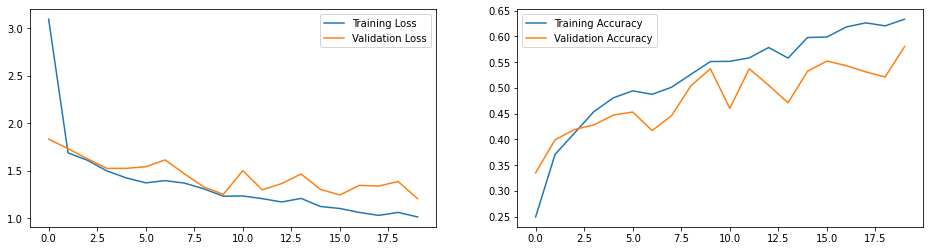

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(model.predict(test_it, steps=len(test_it)), axis=1)

In [ ]:
pred_classes[0:10]

array([0, 5, 0, 2, 0, 8, 3, 0, 0, 0])

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[57,  3,  5,  8,  1,  4,  5,  0, 14,  3],
       [ 1, 87,  2,  0,  1,  5,  0,  0,  4,  0],
       [ 7,  3, 50,  6,  7,  1,  1,  2, 20,  3],
       [ 3,  0, 10, 50, 11,  0,  5,  8,  8,  5],
       [ 0,  0,  0,  6, 57,  0,  4,  6, 26,  1],
       [10, 11,  9,  2,  6, 39,  0,  1, 19,  3],
       [ 3,  0,  2,  1,  3,  0, 86,  0,  2,  3],
       [ 0,  0,  2,  7, 14,  0,  1, 69,  7,  0],
       [ 3,  0,  4,  3, 20,  0,  1,  7, 62,  0],
       [ 9,  3, 16, 14,  7,  0, 16,  3,  8, 24]], dtype=int32)>

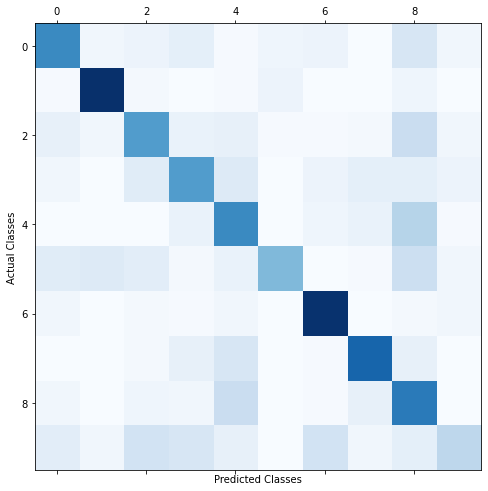

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 1-FINAL:** 


DNN with 2 layers (with NO regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 256, 256 nodes (respectively) and use the `relu` activation function.
* The final layer outputs 10 probability results, using the `softmax` activiation function.  
* No Early Stopping callback

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(128,128,3)))
model.add(layers.Dense(256, activation='relu'))#, kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(256, activation='relu'))#, kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               12583168  
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 12,651,530
Trainable params: 12,651,530
Non-trainable params: 0
_________________________________________________________________


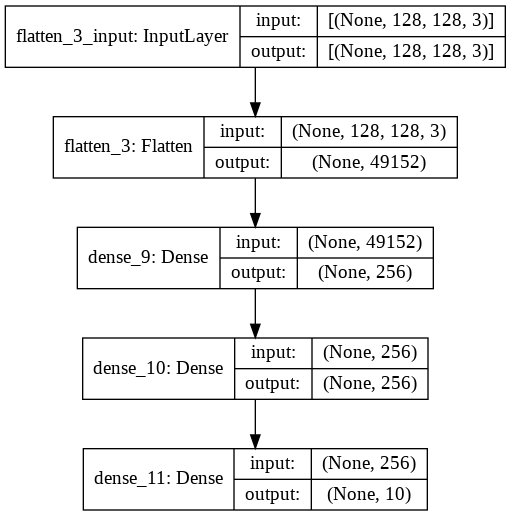

In [ ]:
keras.utils.plot_model(model, "Music_1F1.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=30,
                    callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_1F1/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                          
                    )
model_time = time() - start

Epoch 1/30
125/125 [==============================] - 30s 233ms/step - loss: 3.3618 - accuracy: 0.2562 - val_loss: 1.7935 - val_accuracy: 0.3790
Epoch 2/30
125/125 [==============================] - 29s 229ms/step - loss: 1.6727 - accuracy: 0.3728 - val_loss: 1.7515 - val_accuracy: 0.3590
Epoch 3/30
125/125 [==============================] - 29s 228ms/step - loss: 1.6080 - accuracy: 0.4128 - val_loss: 1.6838 - val_accuracy: 0.4330
Epoch 4/30
125/125 [==============================] - 28s 225ms/step - loss: 1.4707 - accuracy: 0.4631 - val_loss: 1.4530 - val_accuracy: 0.4580
Epoch 5/30
125/125 [==============================] - 28s 226ms/step - loss: 1.4388 - accuracy: 0.4800 - val_loss: 1.4876 - val_accuracy: 0.4540
Epoch 6/30
125/125 [==============================] - 28s 226ms/step - loss: 1.4190 - accuracy: 0.4812 - val_loss: 1.4501 - val_accuracy: 0.4470
Epoch 7/30
125/125 [==============================] - 28s 226ms/step - loss: 1.3672 - accuracy: 0.4959 - val_loss: 1.3709 - val_ac

## Evaluate the model

In [ ]:
model_time

914.8251740932465

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 100ms/step - loss: 1.1027 - accuracy: 0.6120
test set accuracy:  61.19999885559082
test set loss:  1.1026989221572876


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
25,0.864,0.694,1.275,0.571
26,0.794,0.719,1.167,0.585
27,0.803,0.712,1.076,0.632
28,0.821,0.701,1.419,0.551
29,0.805,0.711,1.090,0.618


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

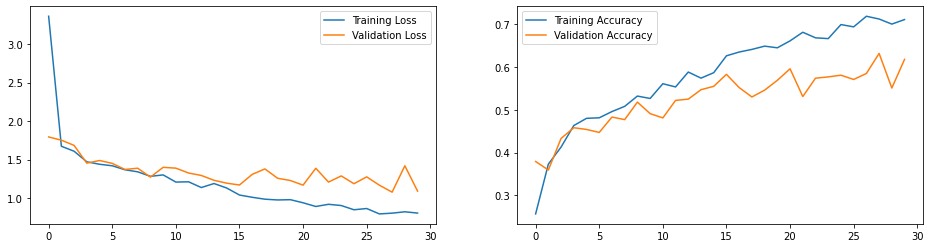

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[73,  2,  8,  0,  1,  7,  3,  0,  3,  3],
       [ 1, 82,  6,  0,  1,  7,  0,  0,  3,  0],
       [ 7,  0, 69,  1,  2,  3,  0,  2,  6, 10],
       [ 5,  1, 11, 27, 14,  0,  3,  5, 11, 23],
       [ 1,  0,  3,  4, 56,  1,  3,  2, 26,  4],
       [ 7,  2,  9,  0,  3, 66,  0,  1,  5,  7],
       [ 2,  0,  5,  1,  2,  0, 77,  0,  0, 13],
       [ 0,  1,  8,  3, 14,  1,  0, 57, 11,  5],
       [ 3,  0, 12,  0, 10,  2,  0,  3, 66,  4],
       [10,  3, 17,  5,  5,  2,  8,  0, 11, 39]], dtype=int32)>

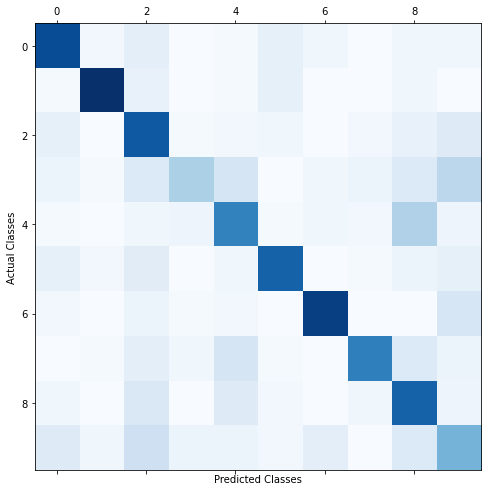

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 2:** 


DNN with 2 layers (with L2 regularization)

## Create the Model

### Build DNN Model

* We use a Sequential class defined in Keras to create our model. 
* The first layer Flatten changes the shape of each picture from 32x32 pixels, 3 channels deep (A 3D array (32,32,3)) into a one-dimensional array of 3072 digits.  
* The hidden 2 layers are each fully connected Dense layers with 256, 256 nodes (respectively) and use the `relu` activation function.
 * A L2 Regularization (NO L1) is added with L2=0.003 reduce overfitting
* The final layer outputs 10 probability results, using the `softmax` activiation function.  
* No Early Stopping callback

In [ ]:
model = models.Sequential() 
model.add(layers.Flatten(input_shape=(128,128,3)))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.003))) 
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               12583168  
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 12,651,530
Trainable params: 12,651,530
Non-trainable params: 0
_________________________________________________________________


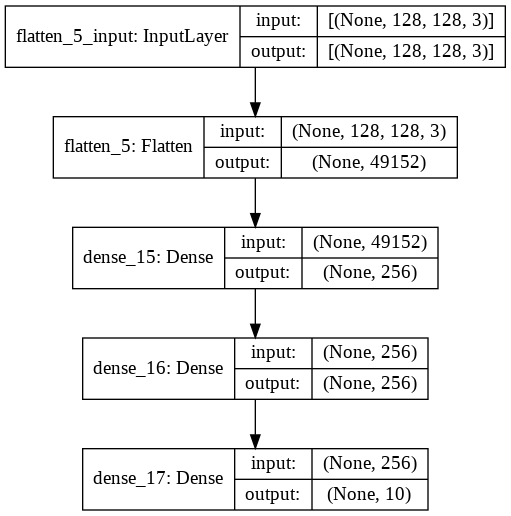

In [ ]:
keras.utils.plot_model(model, "Music_1F2.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=30,
                    callbacks=[
                    #tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_1F2/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                          
                    )
model_time = time() - start

Epoch 1/30
125/125 [==============================] - 27s 214ms/step - loss: 5.4318 - accuracy: 0.2526 - val_loss: 2.5585 - val_accuracy: 0.3730
Epoch 2/30
125/125 [==============================] - 26s 210ms/step - loss: 2.4110 - accuracy: 0.3801 - val_loss: 2.6091 - val_accuracy: 0.3310
Epoch 3/30
125/125 [==============================] - 26s 210ms/step - loss: 2.1822 - accuracy: 0.3914 - val_loss: 2.2342 - val_accuracy: 0.3630
Epoch 4/30
125/125 [==============================] - 26s 212ms/step - loss: 2.0587 - accuracy: 0.3980 - val_loss: 2.0217 - val_accuracy: 0.3870
Epoch 5/30
125/125 [==============================] - 26s 209ms/step - loss: 1.9234 - accuracy: 0.4358 - val_loss: 1.8248 - val_accuracy: 0.4630
Epoch 6/30
125/125 [==============================] - 26s 211ms/step - loss: 1.8756 - accuracy: 0.4351 - val_loss: 1.8211 - val_accuracy: 0.4580
Epoch 7/30
125/125 [==============================] - 26s 209ms/step - loss: 1.8247 - accuracy: 0.4465 - val_loss: 1.9095 - val_ac

## Evaluate the model

In [ ]:
model_time

876.1527388095856

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 95ms/step - loss: 1.4777 - accuracy: 0.5430
test set accuracy:  54.29999828338623
test set loss:  1.4777134656906128


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
25,1.551,0.499,1.533,0.503
26,1.495,0.529,1.470,0.540
27,1.505,0.519,1.563,0.515
28,1.494,0.513,1.617,0.469
29,1.486,0.521,1.493,0.516


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

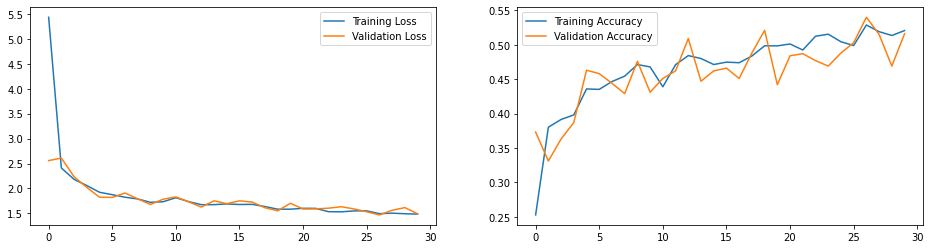

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

### Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[39,  3,  9, 13,  2, 13, 10,  0,  6,  5],
       [ 1, 70,  5,  1,  1, 19,  1,  0,  2,  0],
       [ 6,  3, 38,  5,  7,  2,  0, 11, 10, 18],
       [ 1,  0,  3, 57,  7,  0,  3, 19,  3,  7],
       [ 0,  0,  0, 14, 49,  0,  5, 24,  7,  1],
       [ 7,  5,  8,  3,  6, 43,  0, 10, 15,  3],
       [ 1,  0,  1,  3,  2,  0, 83,  0,  1,  9],
       [ 0,  0,  1,  1,  2,  1,  0, 89,  1,  5],
       [ 0,  0,  5,  4, 23,  5,  1, 23, 36,  3],
       [ 8,  3,  8, 12,  3,  1, 11, 10,  5, 39]], dtype=int32)>

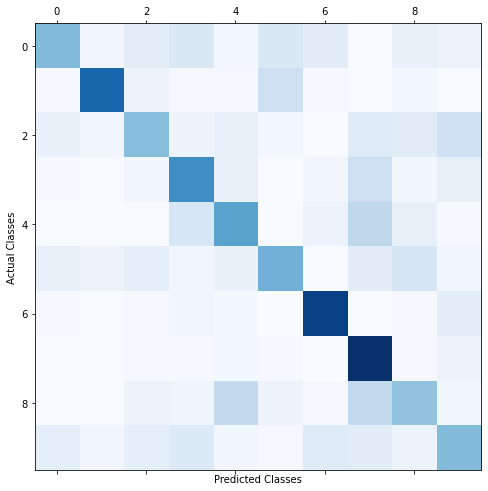

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 3:** 


CNN with 2 convolution/max pooling layers (no regularization)



## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu))#,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               14745728  
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

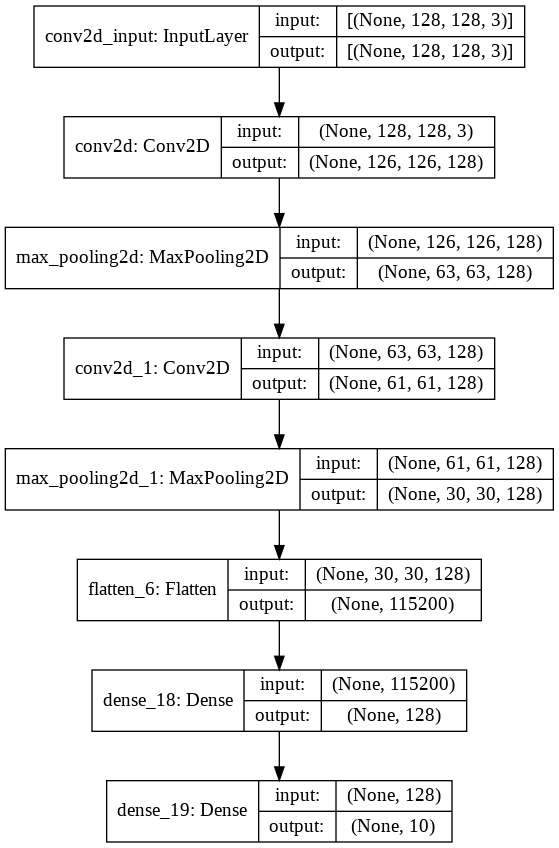

In [ ]:
keras.utils.plot_model(model, "Music_3.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_3/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 60s 258ms/step - loss: 1.8129 - accuracy: 0.3590 - val_loss: 1.5364 - val_accuracy: 0.4640
Epoch 2/200
125/125 [==============================] - 32s 253ms/step - loss: 1.3476 - accuracy: 0.5203 - val_loss: 1.4122 - val_accuracy: 0.5140
Epoch 3/200
125/125 [==============================] - 32s 253ms/step - loss: 1.1246 - accuracy: 0.5978 - val_loss: 1.2166 - val_accuracy: 0.5780
Epoch 4/200
125/125 [==============================] - 32s 252ms/step - loss: 0.9121 - accuracy: 0.6852 - val_loss: 1.1498 - val_accuracy: 0.6120
Epoch 5/200
125/125 [==============================] - 32s 254ms/step - loss: 0.7400 - accuracy: 0.7484 - val_loss: 1.0402 - val_accuracy: 0.6370
Epoch 6/200
125/125 [==============================] - 32s 251ms/step - loss: 0.5856 - accuracy: 0.8041 - val_loss: 1.0392 - val_accuracy: 0.6580
Epoch 7/200
125/125 [==============================] - 32s 253ms/step - loss: 0.4619 - accuracy: 0.8441 - val_loss: 1.0479 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

516.0903205871582

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 112ms/step - loss: 1.4839 - accuracy: 0.6730
test set accuracy:  67.29999780654907
test set loss:  1.4838637113571167


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
9,0.184,0.945,1.242,0.682
10,0.119,0.969,1.299,0.690
11,0.078,0.979,1.417,0.676
12,0.056,0.988,1.426,0.680
13,0.070,0.982,1.609,0.671


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

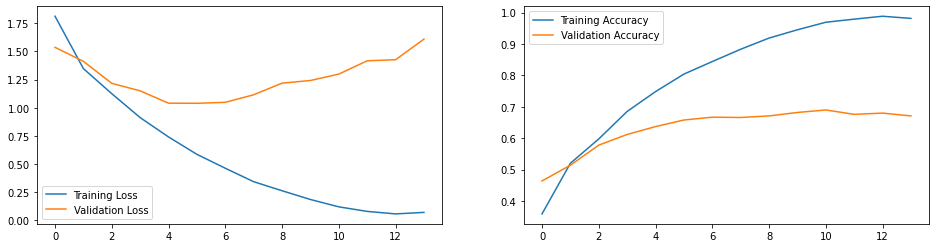

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[82,  0,  1,  1,  1,  4,  4,  0,  3,  4],
       [ 4, 86,  1,  0,  1,  8,  0,  0,  0,  0],
       [ 9,  4, 46,  5,  1, 13,  4,  4,  3, 11],
       [ 6,  0,  0, 56,  4,  2,  7,  5,  8, 12],
       [ 2,  0,  2,  6, 57,  1,  6,  5, 14,  7],
       [ 6,  9,  2,  0,  1, 78,  0,  1,  0,  3],
       [ 2,  0,  0,  0,  1,  1, 93,  0,  0,  3],
       [ 0,  1,  2,  7,  7,  2,  1, 71,  5,  4],
       [ 8,  0,  2,  6,  9,  3,  1,  6, 55, 10],
       [ 7,  2,  4,  3,  3,  3, 22,  0,  7, 49]], dtype=int32)>

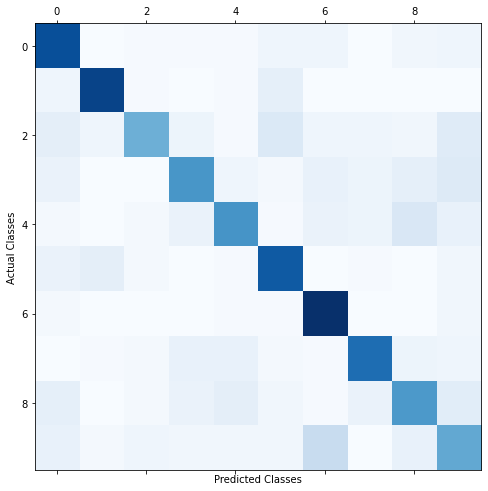

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 3R:** 


CNN with 2 convolution/max pooling layers (with L2 regularization)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               14745728  
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

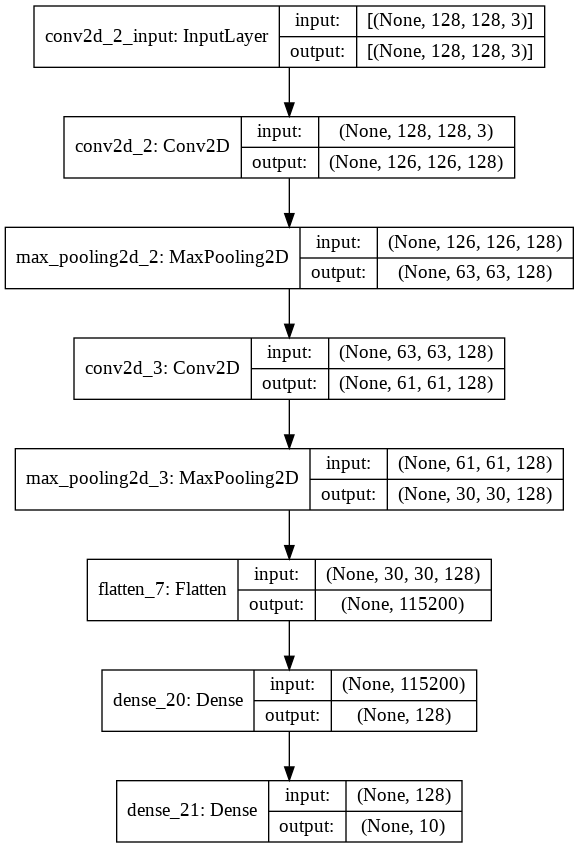

In [ ]:
keras.utils.plot_model(model, "Music_3R.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_3R/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 33s 259ms/step - loss: 2.1197 - accuracy: 0.3501 - val_loss: 1.6089 - val_accuracy: 0.5020
Epoch 2/200
125/125 [==============================] - 32s 257ms/step - loss: 1.5395 - accuracy: 0.5008 - val_loss: 1.4746 - val_accuracy: 0.5370
Epoch 3/200
125/125 [==============================] - 32s 256ms/step - loss: 1.3368 - accuracy: 0.5800 - val_loss: 1.3857 - val_accuracy: 0.5530
Epoch 4/200
125/125 [==============================] - 32s 258ms/step - loss: 1.2405 - accuracy: 0.6330 - val_loss: 1.3223 - val_accuracy: 0.5830
Epoch 5/200
125/125 [==============================] - 32s 256ms/step - loss: 1.1317 - accuracy: 0.6741 - val_loss: 1.3560 - val_accuracy: 0.5840
Epoch 6/200
125/125 [==============================] - 33s 261ms/step - loss: 1.0655 - accuracy: 0.7049 - val_loss: 1.2691 - val_accuracy: 0.6080
Epoch 7/200
125/125 [==============================] - 33s 259ms/step - loss: 0.9632 - accuracy: 0.7441 - val_loss: 1.1849 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

393.720876455307

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 114ms/step - loss: 1.1848 - accuracy: 0.6860
test set accuracy:  68.59999895095825
test set loss:  1.184769630432129


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
6,0.963,0.744,1.185,0.664
7,0.916,0.767,1.217,0.676
8,0.852,0.794,1.351,0.635
9,0.823,0.812,1.226,0.675
10,0.739,0.839,1.265,0.667


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

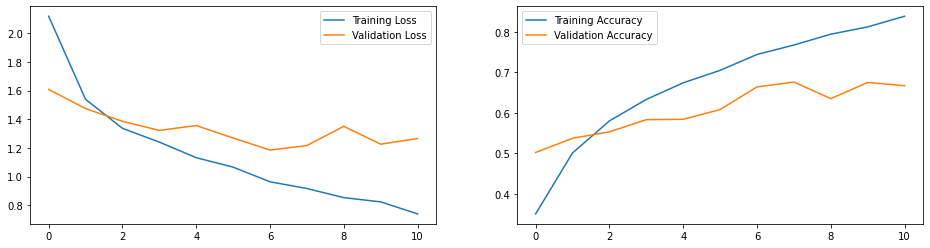

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[75,  3,  2,  6,  3,  3,  2,  0,  1,  5],
       [ 1, 91,  2,  1,  1,  3,  0,  0,  0,  1],
       [ 5,  3, 66,  7,  1,  4,  0,  4,  0, 10],
       [ 3,  0,  2, 70,  7,  1,  2, 10,  0,  5],
       [ 1,  0,  2, 12, 65,  0,  7,  8,  3,  2],
       [ 6, 11,  4,  0,  2, 72,  0,  1,  0,  4],
       [ 3,  0,  2,  0,  1,  0, 87,  1,  0,  6],
       [ 0,  1,  2, 15,  3,  0,  0, 76,  1,  2],
       [ 6,  1,  9, 15, 18,  2,  0, 11, 32,  6],
       [ 6,  1,  5, 12,  5,  5,  9,  5,  0, 52]], dtype=int32)>

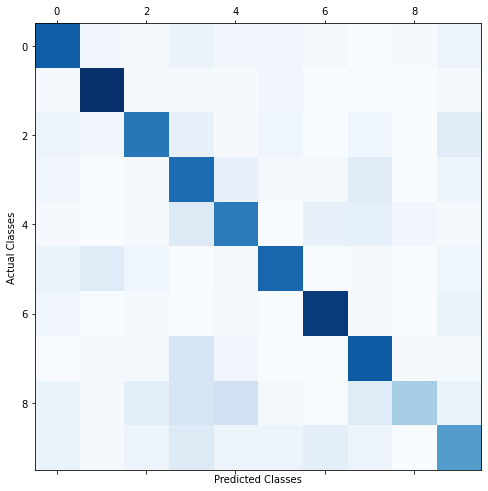

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Predictions

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
0,0.66%,0.06%,0.95%,78.22%,0.20%,13.15%,5.40%,0.02%,1.11%,0.22%
1,0.86%,2.71%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,96.34%,0.10%
2,2.52%,24.56%,0.04%,0.18%,0.11%,0.02%,0.04%,0.08%,70.75%,1.70%
3,55.26%,2.84%,0.53%,0.25%,0.32%,0.00%,0.04%,0.06%,39.89%,0.80%
4,0.00%,0.02%,0.50%,3.59%,17.18%,0.38%,78.25%,0.00%,0.06%,0.01%
5,0.01%,0.01%,0.67%,2.63%,0.12%,1.24%,95.19%,0.02%,0.06%,0.05%
6,0.38%,88.86%,0.07%,2.86%,0.00%,1.52%,0.12%,0.03%,0.01%,6.15%
7,5.44%,0.16%,9.87%,1.84%,5.39%,0.89%,75.82%,0.16%,0.24%,0.19%
8,0.37%,0.03%,3.06%,87.47%,1.30%,2.13%,4.84%,0.68%,0.08%,0.04%
9,0.04%,97.00%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%,0.10%,2.83%


# **EXPERIMENT 4:** 


CNN with 3 convolution/max pooling layers (no regularization)



## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu))#,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 25088)            

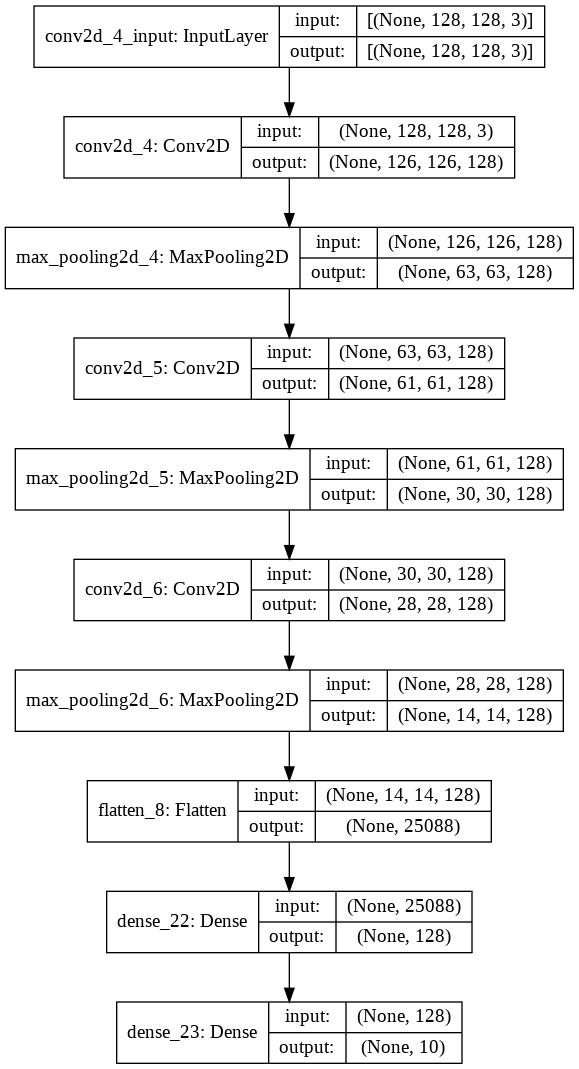

In [ ]:
keras.utils.plot_model(model, "Music_4.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 34s 265ms/step - loss: 1.8624 - accuracy: 0.3198 - val_loss: 1.4871 - val_accuracy: 0.4730
Epoch 2/200
125/125 [==============================] - 33s 265ms/step - loss: 1.3269 - accuracy: 0.5274 - val_loss: 1.2689 - val_accuracy: 0.5490
Epoch 3/200
125/125 [==============================] - 34s 270ms/step - loss: 1.0728 - accuracy: 0.6277 - val_loss: 1.2348 - val_accuracy: 0.5480
Epoch 4/200
125/125 [==============================] - 33s 265ms/step - loss: 0.9222 - accuracy: 0.6811 - val_loss: 1.1254 - val_accuracy: 0.6110
Epoch 5/200
125/125 [==============================] - 33s 262ms/step - loss: 0.7849 - accuracy: 0.7320 - val_loss: 1.0192 - val_accuracy: 0.6420
Epoch 6/200
125/125 [==============================] - 33s 264ms/step - loss: 0.6571 - accuracy: 0.7730 - val_loss: 1.0726 - val_accuracy: 0.6200
Epoch 7/200
125/125 [==============================] - 33s 262ms/step - loss: 0.5204 - accuracy: 0.8209 - val_loss: 1.1350 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

373.8217570781708

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 116ms/step - loss: 1.4644 - accuracy: 0.6520
test set accuracy:  65.20000100135803
test set loss:  1.464386224746704


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
6,0.520,0.821,1.135,0.647
7,0.403,0.862,1.037,0.688
8,0.318,0.888,1.117,0.667
9,0.227,0.925,1.306,0.662
10,0.156,0.949,1.332,0.677


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

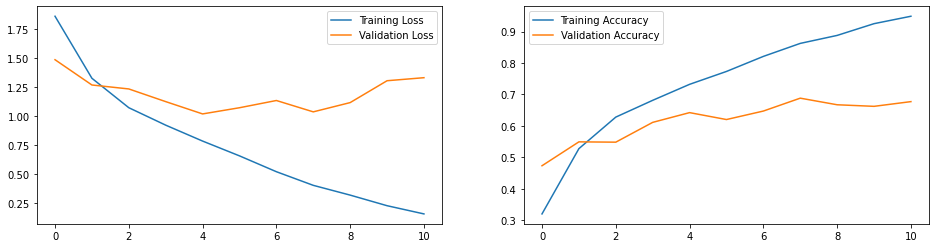

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[75,  1,  4,  1,  3,  9,  0,  0,  2,  5],
       [ 0, 84,  1,  0,  0,  9,  0,  1,  0,  5],
       [ 8,  0, 50,  1,  0,  9,  0,  2,  2, 28],
       [ 5,  0,  3, 48,  5,  0,  1,  8, 10, 20],
       [ 1,  0,  2,  8, 57,  0,  7,  5, 10, 10],
       [ 6, 10,  6,  1,  0, 66,  0,  0,  2,  9],
       [ 0,  0,  0,  2,  1,  1, 81,  0,  1, 14],
       [ 0,  1,  5,  9, 11,  1,  1, 64,  4,  4],
       [ 3,  0,  4,  3,  7,  1,  1,  3, 70,  8],
       [ 9,  0,  7,  3,  4,  2, 10,  3,  5, 57]], dtype=int32)>

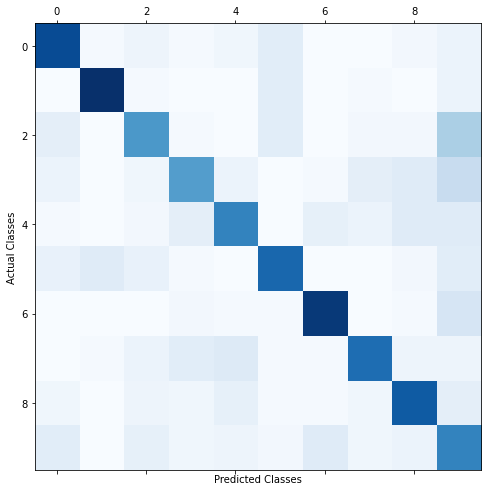

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 4R:** 


CNN with 3 convolution/max pooling layers (with L2 regularization)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 25088)            

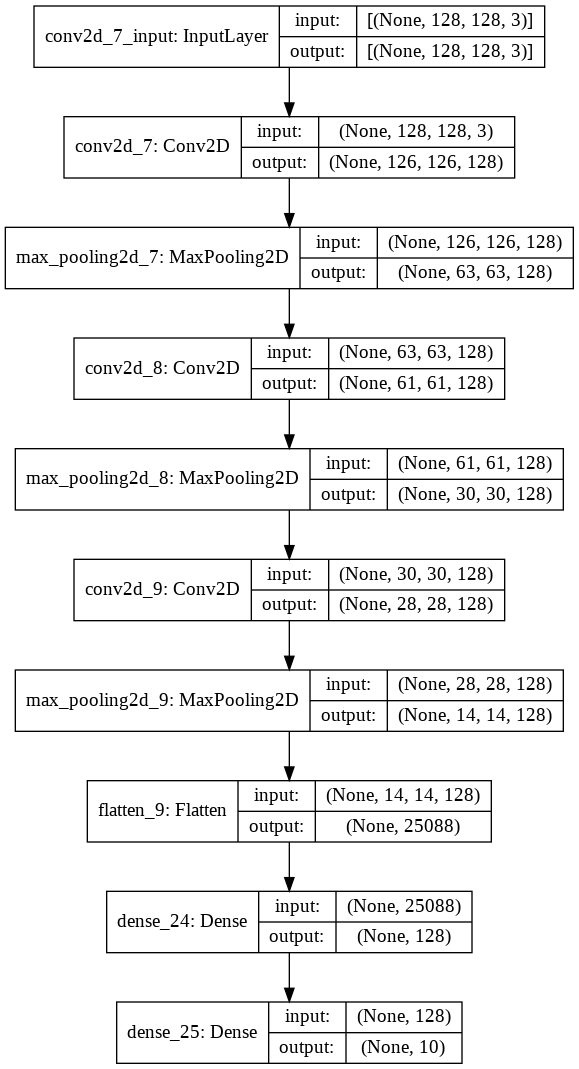

In [ ]:
keras.utils.plot_model(model, "Music_4R1.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4R1/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 34s 264ms/step - loss: 1.9459 - accuracy: 0.3416 - val_loss: 1.5928 - val_accuracy: 0.4820
Epoch 2/200
125/125 [==============================] - 33s 260ms/step - loss: 1.4701 - accuracy: 0.5144 - val_loss: 1.3757 - val_accuracy: 0.5400
Epoch 3/200
125/125 [==============================] - 33s 261ms/step - loss: 1.2761 - accuracy: 0.6036 - val_loss: 1.4331 - val_accuracy: 0.5420
Epoch 4/200
125/125 [==============================] - 33s 260ms/step - loss: 1.1215 - accuracy: 0.6616 - val_loss: 1.1948 - val_accuracy: 0.6290
Epoch 5/200
125/125 [==============================] - 33s 261ms/step - loss: 0.9939 - accuracy: 0.7149 - val_loss: 1.1484 - val_accuracy: 0.6540
Epoch 6/200
125/125 [==============================] - 33s 261ms/step - loss: 0.8938 - accuracy: 0.7617 - val_loss: 1.1494 - val_accuracy: 0.6720
Epoch 7/200
125/125 [==============================] - 33s 260ms/step - loss: 0.7960 - accuracy: 0.7960 - val_loss: 1.0919 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

476.8521203994751

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 115ms/step - loss: 1.4555 - accuracy: 0.6740
test set accuracy:  67.40000247955322
test set loss:  1.4555126428604126


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
9,0.583,0.884,1.226,0.707
10,0.532,0.908,1.280,0.714
11,0.522,0.913,1.345,0.682
12,0.487,0.924,1.358,0.705
13,0.453,0.941,1.465,0.675


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

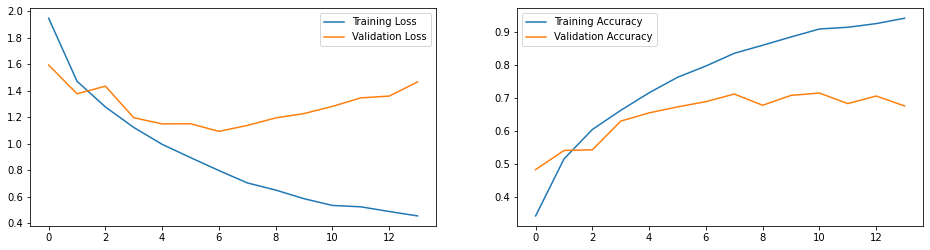

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[75,  2,  3,  2,  1,  6,  0,  0,  5,  6],
       [ 1, 94,  1,  0,  0,  4,  0,  0,  0,  0],
       [ 9,  1, 58,  8,  0,  0,  2,  3,  2, 17],
       [ 4,  1,  1, 73,  2,  0,  0,  6,  5,  8],
       [ 4,  0,  2, 21, 37,  0,  3, 10, 16,  7],
       [ 3, 10,  7,  3,  0, 66,  0,  1,  3,  7],
       [ 2,  0,  1,  2,  1,  0, 86,  0,  1,  7],
       [ 0,  0,  4, 23,  2,  0,  0, 63,  3,  5],
       [ 2,  0,  8, 11,  1,  0,  2,  4, 63,  9],
       [ 8,  4,  9,  8,  1,  0,  7,  1,  3, 59]], dtype=int32)>

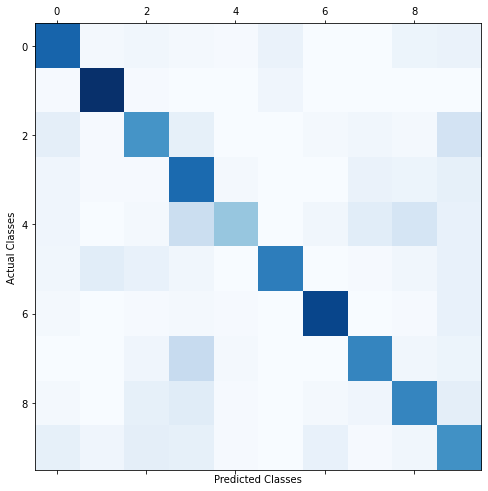

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 4R2:** 


CNN with 3 convolution/max pooling layers (with Drop Out regularization)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))

model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 25088)           

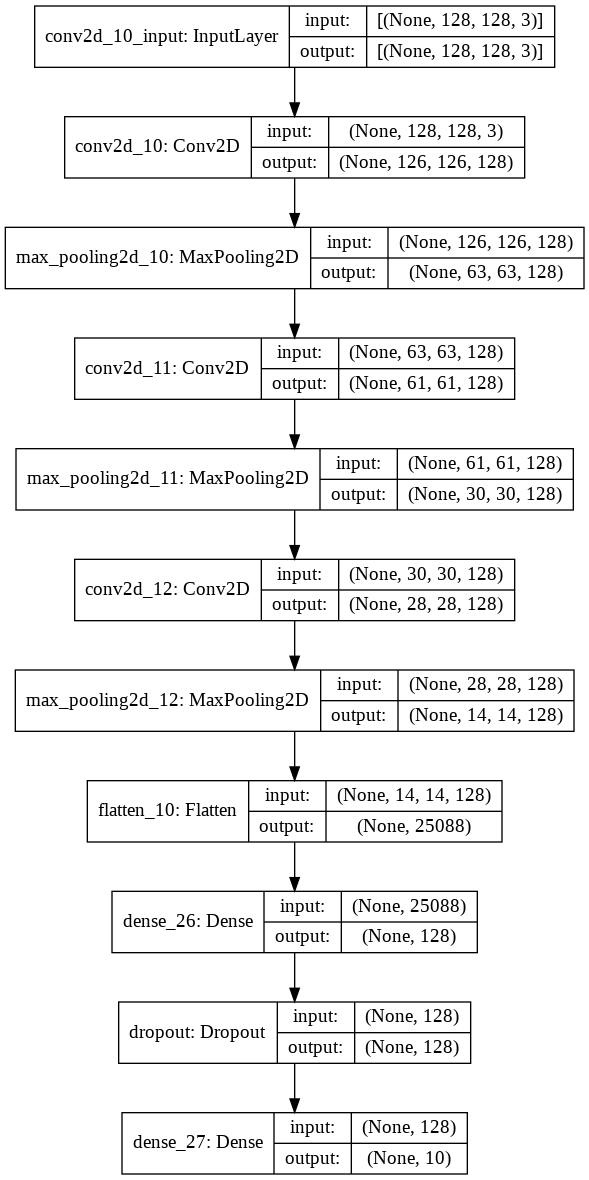

In [ ]:
keras.utils.plot_model(model, "Music_4R2.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4R2/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 33s 259ms/step - loss: 2.0836 - accuracy: 0.2820 - val_loss: 1.8028 - val_accuracy: 0.3810
Epoch 2/200
125/125 [==============================] - 32s 257ms/step - loss: 1.6472 - accuracy: 0.4498 - val_loss: 1.5034 - val_accuracy: 0.4940
Epoch 3/200
125/125 [==============================] - 32s 259ms/step - loss: 1.4530 - accuracy: 0.5271 - val_loss: 1.3521 - val_accuracy: 0.5720
Epoch 4/200
125/125 [==============================] - 32s 257ms/step - loss: 1.3252 - accuracy: 0.5924 - val_loss: 1.2685 - val_accuracy: 0.6130
Epoch 5/200
125/125 [==============================] - 32s 258ms/step - loss: 1.2375 - accuracy: 0.6339 - val_loss: 1.2894 - val_accuracy: 0.6050
Epoch 6/200
125/125 [==============================] - 32s 257ms/step - loss: 1.1282 - accuracy: 0.6721 - val_loss: 1.1575 - val_accuracy: 0.6490
Epoch 7/200
125/125 [==============================] - 32s 258ms/step - loss: 1.0667 - accuracy: 0.6975 - val_loss: 1.1939 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

398.0186114311218

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 114ms/step - loss: 1.3105 - accuracy: 0.6580
test set accuracy:  65.79999923706055
test set loss:  1.3105125427246094


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
7,0.998,0.734,1.219,0.657
8,0.965,0.747,1.204,0.674
9,0.903,0.778,1.214,0.655
10,0.871,0.790,1.254,0.664
11,0.806,0.819,1.306,0.653


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

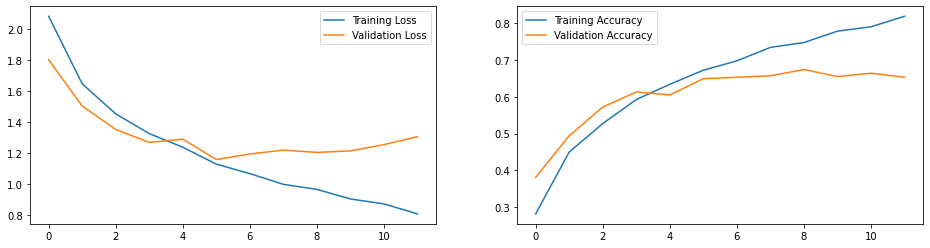

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[64,  4,  4, 13,  2,  3,  0,  0,  5,  5],
       [ 0, 95,  0,  0,  0,  4,  0,  0,  0,  1],
       [ 5,  0, 48, 10,  2,  6,  1, 13,  3, 12],
       [ 2,  0,  1, 69,  3,  0,  1, 14,  4,  6],
       [ 0,  0,  1, 23, 40,  0,  2, 20, 12,  2],
       [ 4, 11,  5,  5,  1, 58,  0,  7,  6,  3],
       [ 1,  0,  0,  4,  0,  0, 90,  0,  1,  4],
       [ 0,  1,  2,  4,  3,  0,  1, 87,  1,  1],
       [ 3,  0,  2,  7,  4,  0,  1, 15, 66,  2],
       [ 3,  1,  5, 22,  2,  0, 12,  9,  5, 41]], dtype=int32)>

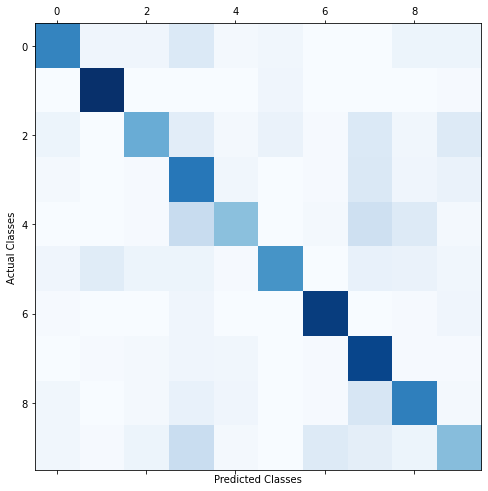

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 4R3:** 


CNN with 3 convolution/max pooling layers (with Drop Out regularization)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))

model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 61, 61, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 128)     

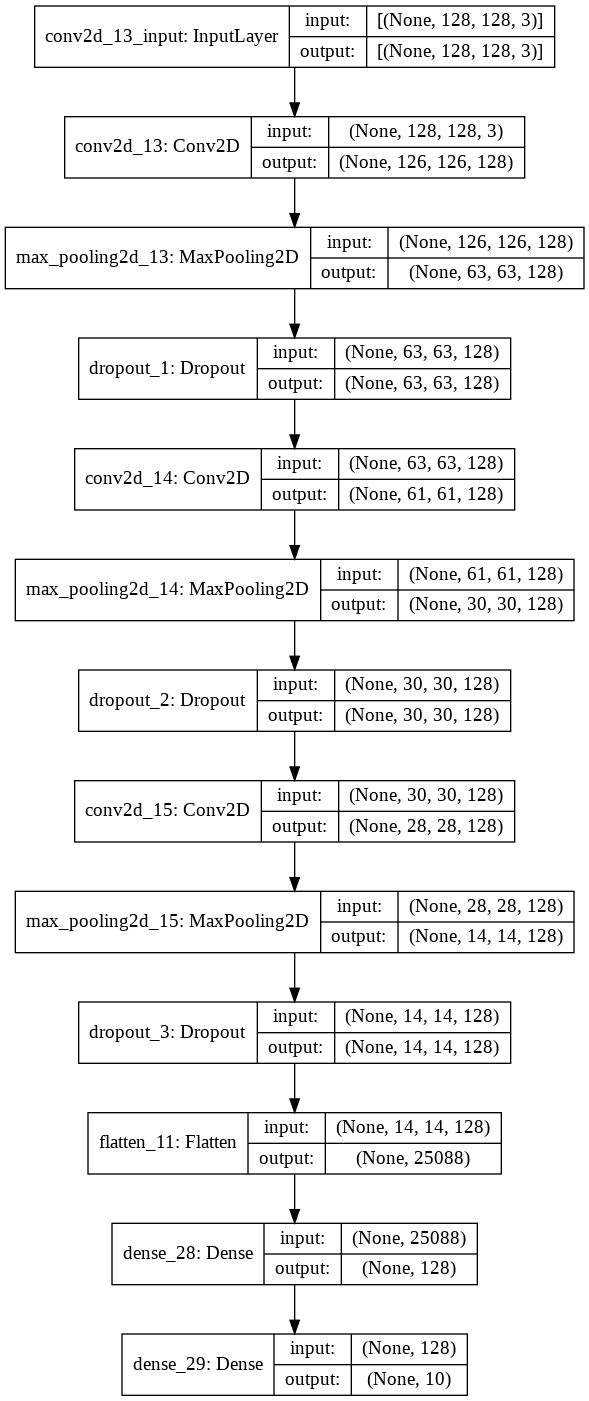

In [ ]:
keras.utils.plot_model(model, "Music_4R3.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_4R3/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 33s 261ms/step - loss: 2.1179 - accuracy: 0.3089 - val_loss: 1.7556 - val_accuracy: 0.3890
Epoch 2/200
125/125 [==============================] - 33s 263ms/step - loss: 1.5957 - accuracy: 0.4686 - val_loss: 1.4852 - val_accuracy: 0.4990
Epoch 3/200
125/125 [==============================] - 33s 261ms/step - loss: 1.4013 - accuracy: 0.5431 - val_loss: 1.3261 - val_accuracy: 0.5880
Epoch 4/200
125/125 [==============================] - 33s 262ms/step - loss: 1.2447 - accuracy: 0.6101 - val_loss: 1.3312 - val_accuracy: 0.5700
Epoch 5/200
125/125 [==============================] - 33s 261ms/step - loss: 1.1428 - accuracy: 0.6540 - val_loss: 1.1358 - val_accuracy: 0.6510
Epoch 6/200
125/125 [==============================] - 33s 263ms/step - loss: 1.0745 - accuracy: 0.6881 - val_loss: 1.1259 - val_accuracy: 0.6750
Epoch 7/200
125/125 [==============================] - 33s 264ms/step - loss: 0.9920 - accuracy: 0.7179 - val_loss: 1.2163 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

867.5773568153381

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 111ms/step - loss: 1.2298 - accuracy: 0.7390
test set accuracy:  73.90000224113464
test set loss:  1.2297885417938232


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
21,0.548,0.917,1.144,0.744
22,0.563,0.912,1.110,0.773
23,0.529,0.923,1.201,0.747
24,0.528,0.924,1.280,0.699
25,0.510,0.929,1.102,0.760


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

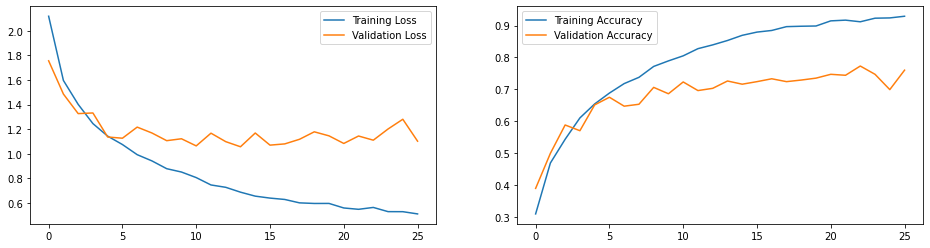

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[76,  1,  4,  1,  1,  9,  0,  0,  1,  7],
       [ 1, 95,  0,  0,  1,  3,  0,  0,  0,  0],
       [ 4,  4, 57,  2,  1, 10,  0,  6,  3, 13],
       [ 5,  0,  2, 59,  3,  1,  0,  8, 10, 12],
       [ 1,  0,  1,  5, 67,  1,  4,  7, 12,  2],
       [ 1, 11,  3,  0,  0, 82,  0,  2,  0,  1],
       [ 3,  0,  0,  1,  1,  1, 85,  0,  0,  9],
       [ 0,  0,  5,  4,  4,  0,  1, 81,  4,  1],
       [ 3,  0,  8,  3,  3,  1,  0,  3, 75,  4],
       [ 8,  1,  9,  3,  1,  4,  5,  7,  0, 62]], dtype=int32)>

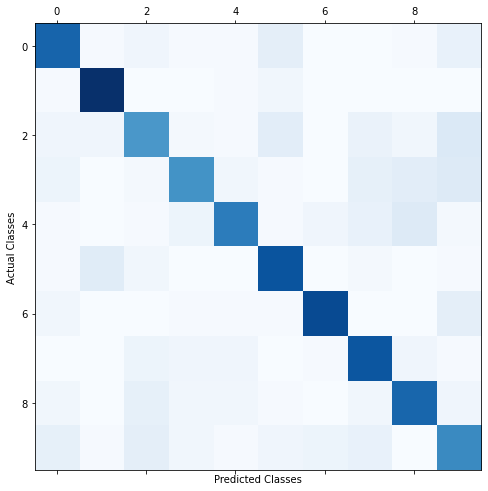

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 5:** 


CNN with 3 convolution/max pooling layers, increasing in size (with L2 regularization and Drop Out)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 3 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 256)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 512)     

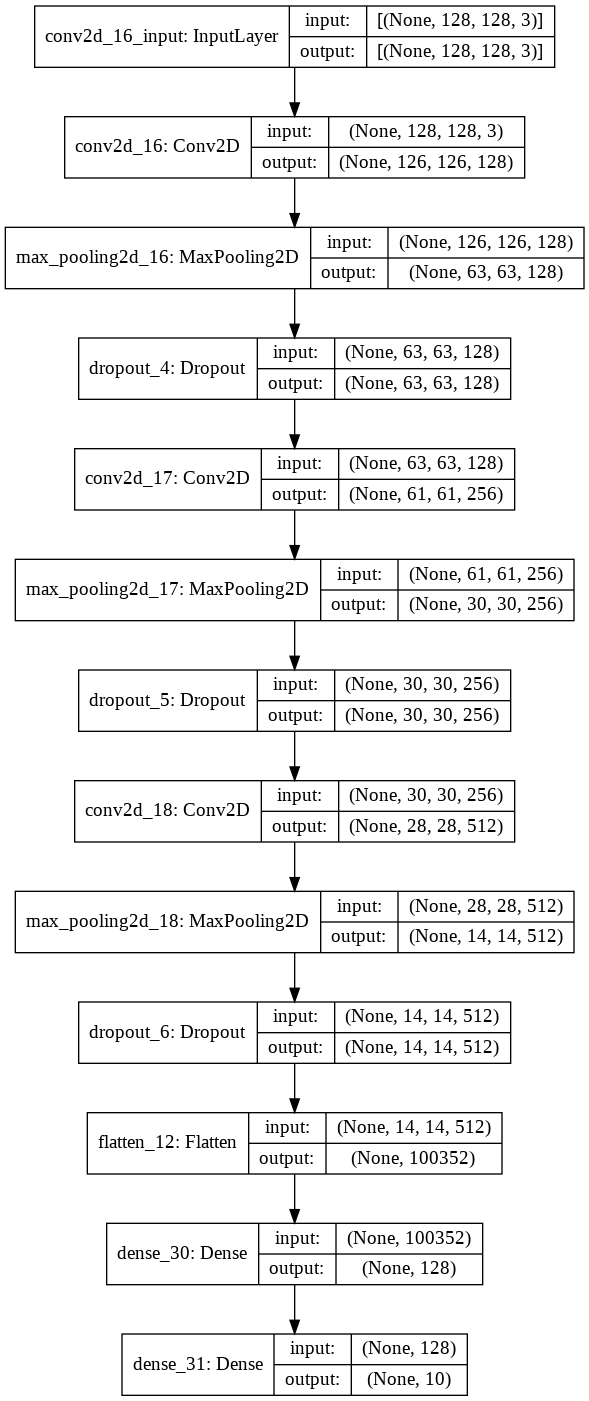

In [ ]:
keras.utils.plot_model(model, "Music_5.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_5/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 49s 346ms/step - loss: 2.3390 - accuracy: 0.2814 - val_loss: 1.8254 - val_accuracy: 0.4160
Epoch 2/200
125/125 [==============================] - 40s 320ms/step - loss: 1.6682 - accuracy: 0.4476 - val_loss: 1.5902 - val_accuracy: 0.4650
Epoch 3/200
125/125 [==============================] - 40s 321ms/step - loss: 1.4612 - accuracy: 0.5164 - val_loss: 1.4478 - val_accuracy: 0.5200
Epoch 4/200
125/125 [==============================] - 40s 320ms/step - loss: 1.3270 - accuracy: 0.5749 - val_loss: 1.3904 - val_accuracy: 0.5180
Epoch 5/200
125/125 [==============================] - 40s 321ms/step - loss: 1.1935 - accuracy: 0.6354 - val_loss: 1.3202 - val_accuracy: 0.5940
Epoch 6/200
125/125 [==============================] - 40s 320ms/step - loss: 1.1151 - accuracy: 0.6701 - val_loss: 1.2646 - val_accuracy: 0.5970
Epoch 7/200
125/125 [==============================] - 40s 321ms/step - loss: 1.0785 - accuracy: 0.6749 - val_loss: 1.2427 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

577.3104355335236

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 115ms/step - loss: 1.2044 - accuracy: 0.6520
test set accuracy:  65.20000100135803
test set loss:  1.204410433769226


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
9,0.895,0.749,1.164,0.668
10,0.842,0.779,1.128,0.702
11,0.818,0.789,1.112,0.676
12,0.763,0.813,1.100,0.683
13,0.751,0.817,1.229,0.648


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

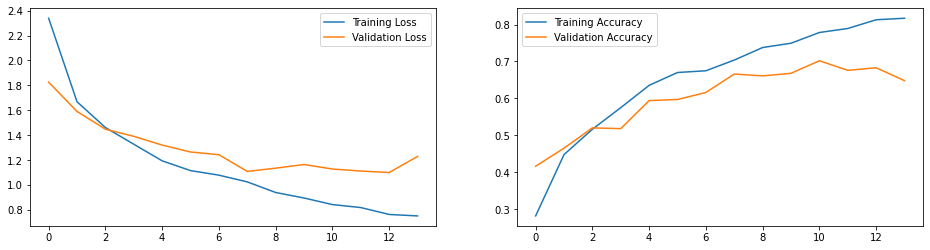

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[78,  3,  3,  0,  0, 16,  0,  0,  0,  0],
       [ 0, 84,  0,  0,  0, 16,  0,  0,  0,  0],
       [15,  3, 58,  2,  0, 14,  0,  2,  2,  4],
       [14,  1,  2, 52,  2,  7,  0,  5,  3, 14],
       [ 5,  0,  3,  8, 64,  4,  2,  7,  2,  5],
       [ 1,  7,  0,  0,  0, 89,  0,  2,  0,  1],
       [ 8,  0,  1,  2,  1,  2, 53,  0,  0, 33],
       [ 0,  0, 11,  9,  3,  4,  0, 65,  7,  1],
       [ 6,  0, 13,  6,  6,  5,  0,  3, 55,  6],
       [16,  0, 12,  5,  0,  8,  1,  3,  1, 54]], dtype=int32)>

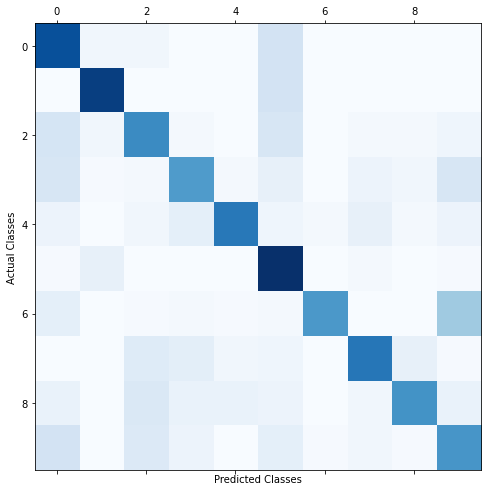

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 6:** 


CNN with 3 convolution/max pooling layers (with Drop Out regularization). Add Padding


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 3 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 128)     

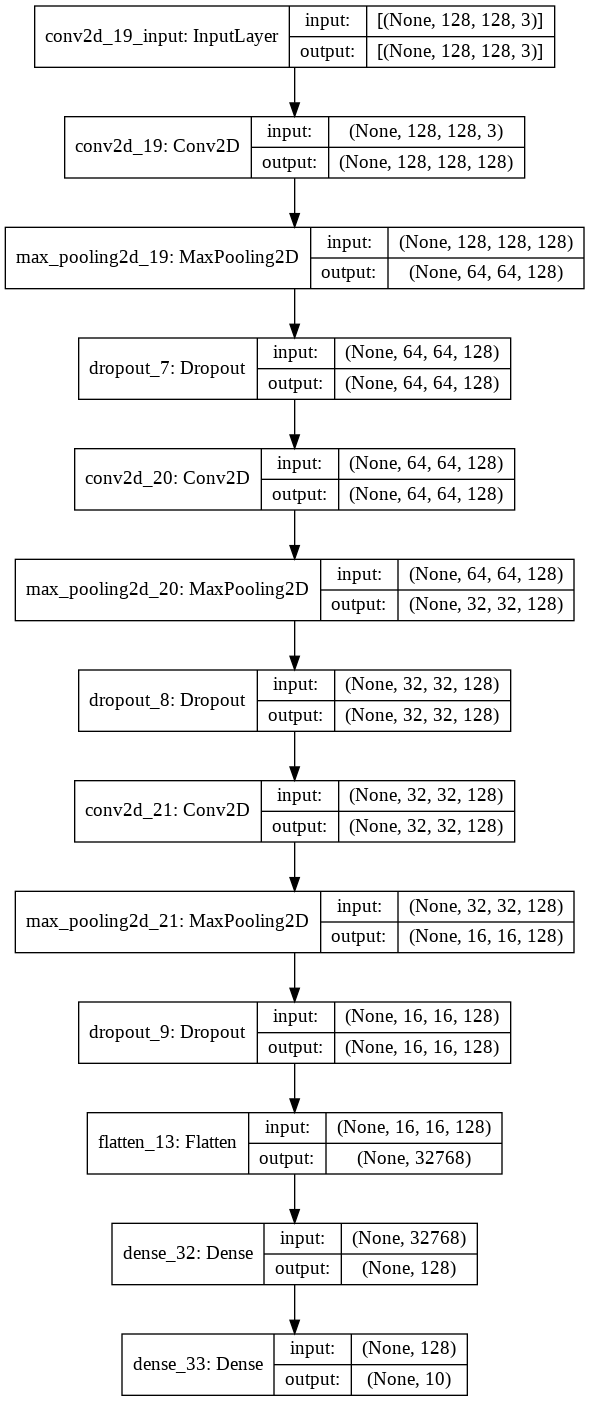

In [ ]:
keras.utils.plot_model(model, "Music_6.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_6/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 37s 271ms/step - loss: 2.1649 - accuracy: 0.3110 - val_loss: 1.6181 - val_accuracy: 0.4650
Epoch 2/200
125/125 [==============================] - 33s 262ms/step - loss: 1.5166 - accuracy: 0.5023 - val_loss: 1.4167 - val_accuracy: 0.5480
Epoch 3/200
125/125 [==============================] - 33s 264ms/step - loss: 1.3693 - accuracy: 0.5506 - val_loss: 1.3295 - val_accuracy: 0.5510
Epoch 4/200
125/125 [==============================] - 33s 262ms/step - loss: 1.1872 - accuracy: 0.6306 - val_loss: 1.2650 - val_accuracy: 0.5900
Epoch 5/200
125/125 [==============================] - 33s 261ms/step - loss: 1.0631 - accuracy: 0.6787 - val_loss: 1.1433 - val_accuracy: 0.6360
Epoch 6/200
125/125 [==============================] - 33s 260ms/step - loss: 0.9772 - accuracy: 0.7135 - val_loss: 1.1056 - val_accuracy: 0.6680
Epoch 7/200
125/125 [==============================] - 33s 262ms/step - loss: 0.8767 - accuracy: 0.7524 - val_loss: 1.1009 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

597.4049360752106

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 109ms/step - loss: 1.1702 - accuracy: 0.7310
test set accuracy:  73.1000006198883
test set loss:  1.1702390909194946


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
13,0.556,0.886,0.943,0.773
14,0.525,0.902,1.001,0.774
15,0.545,0.893,0.984,0.768
16,0.519,0.903,1.045,0.762
17,0.492,0.915,1.166,0.748


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

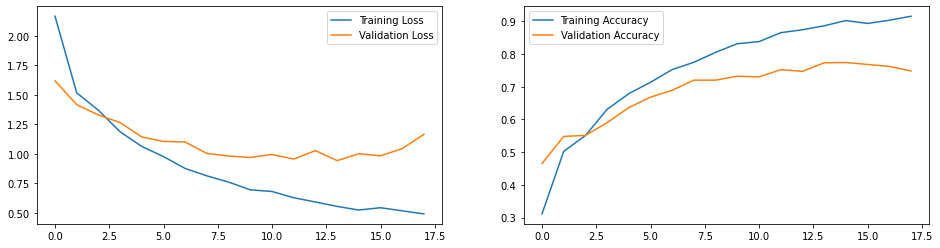

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[78,  1,  1,  2,  0,  5,  3,  0,  0, 10],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 1,  5, 62,  0,  0,  7,  0,  3,  1, 21],
       [ 0,  1,  2, 84,  1,  0,  2,  3,  0,  7],
       [ 1,  0,  0,  1, 75,  0,  7, 12,  1,  3],
       [ 2, 14,  0,  0,  0, 84,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0, 95,  0,  0,  3],
       [ 0,  4,  0,  2,  0,  0,  0, 94,  0,  0],
       [ 6,  0,  3,  6,  0,  3,  0,  0, 78,  4],
       [ 4,  0,  2,  3,  1,  2,  3,  2,  0, 83]], dtype=int32)>

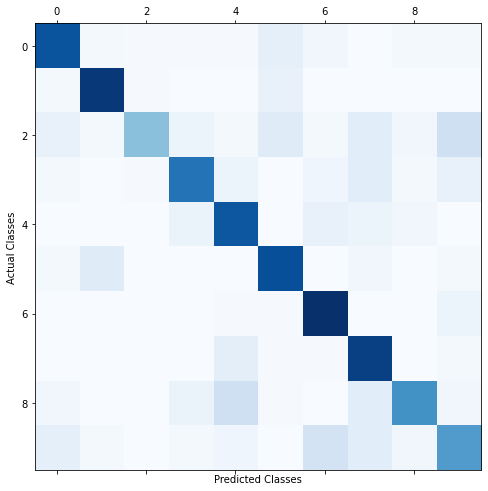

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 7:** 


CNN with 4 convolution/max pooling layers (with Drop Out regularization). Add Padding


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 128, 128, 128)     3584      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 128)     

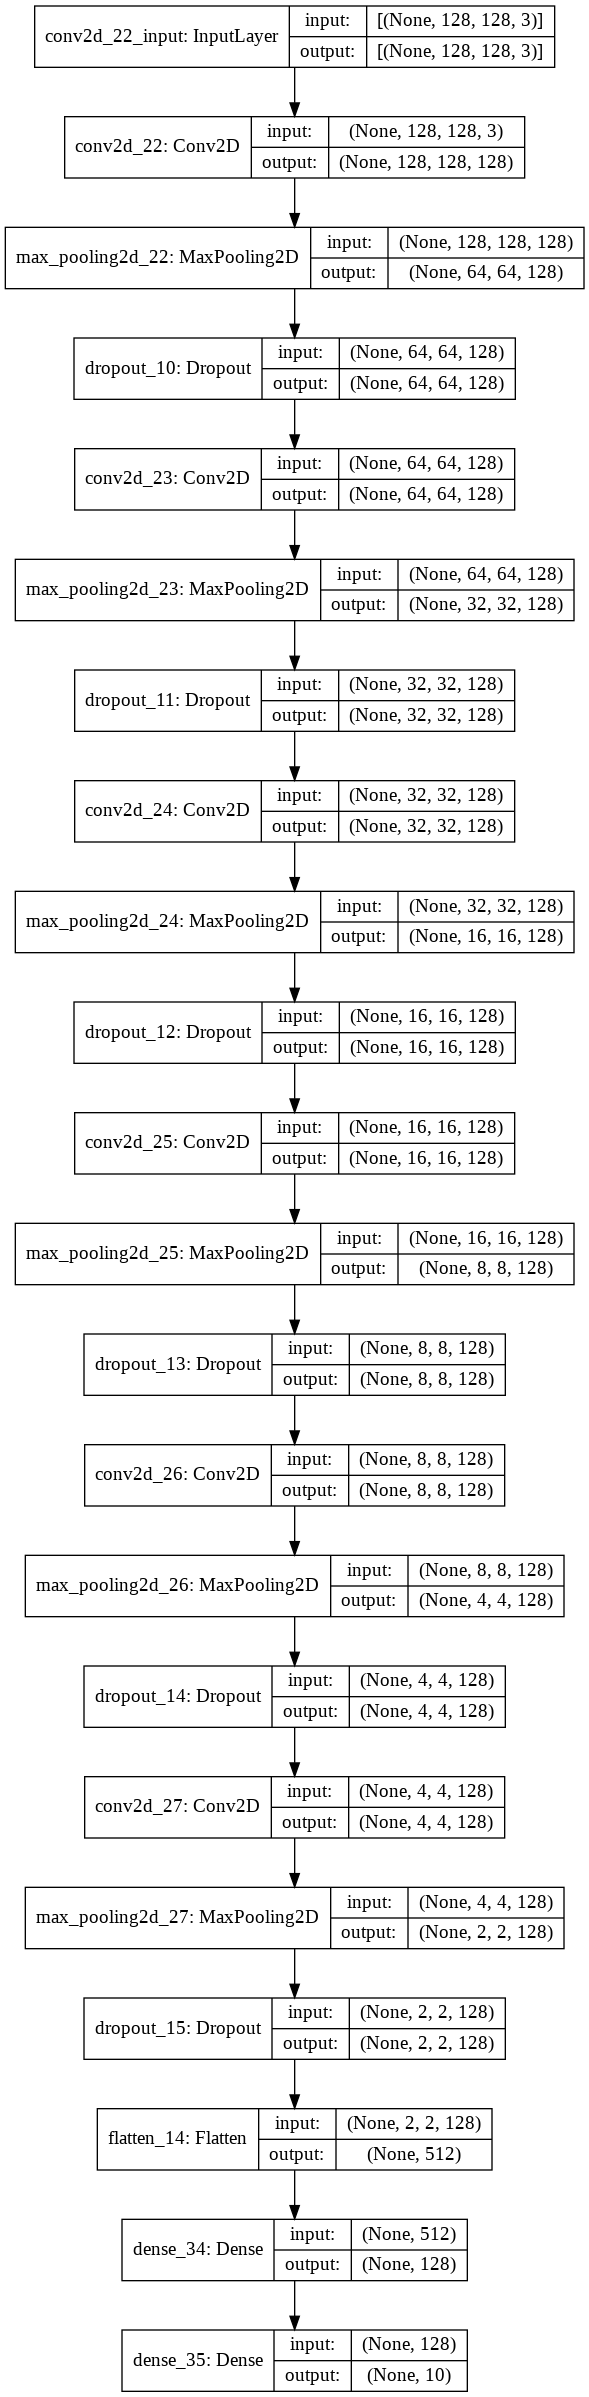

In [ ]:
keras.utils.plot_model(model, "Music_7.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('./models_7/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 34s 265ms/step - loss: 2.3548 - accuracy: 0.2035 - val_loss: 1.8266 - val_accuracy: 0.3710
Epoch 2/200
125/125 [==============================] - 33s 260ms/step - loss: 1.6211 - accuracy: 0.4325 - val_loss: 1.4032 - val_accuracy: 0.5300
Epoch 3/200
125/125 [==============================] - 33s 262ms/step - loss: 1.3513 - accuracy: 0.5285 - val_loss: 1.3160 - val_accuracy: 0.5310
Epoch 4/200
125/125 [==============================] - 33s 262ms/step - loss: 1.1571 - accuracy: 0.6047 - val_loss: 1.1968 - val_accuracy: 0.5990
Epoch 5/200
125/125 [==============================] - 32s 259ms/step - loss: 1.0397 - accuracy: 0.6490 - val_loss: 0.9729 - val_accuracy: 0.6800
Epoch 6/200
125/125 [==============================] - 33s 262ms/step - loss: 0.9142 - accuracy: 0.6929 - val_loss: 0.8404 - val_accuracy: 0.7250
Epoch 7/200
125/125 [==============================] - 33s 260ms/step - loss: 0.8467 - accuracy: 0.7171 - val_loss: 0.7759 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

637.9090464115143

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 112ms/step - loss: 0.5076 - accuracy: 0.8600
test set accuracy:  86.00000143051147
test set loss:  0.5075573325157166


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
14,0.426,0.872,0.608,0.804
15,0.406,0.871,0.462,0.852
16,0.367,0.893,0.476,0.843
17,0.329,0.903,0.549,0.815
18,0.355,0.892,0.491,0.846


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

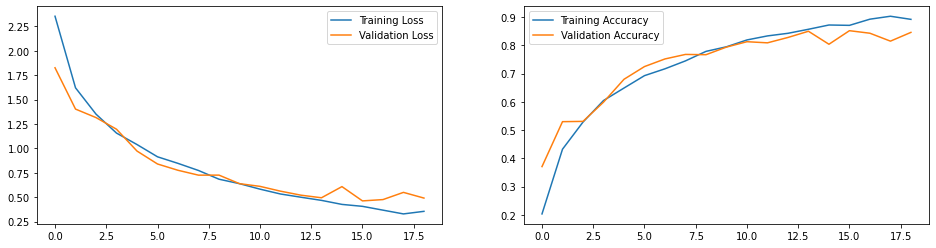

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[73,  4,  5,  1,  0,  7,  5,  0,  1,  4],
       [ 0, 99,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 88,  0,  0,  4,  0,  1,  2,  4],
       [ 0,  0,  2, 87,  3,  0,  1,  2,  0,  5],
       [ 0,  0,  0,  0, 86,  0,  9,  3,  1,  1],
       [ 0,  8,  1,  0,  0, 90,  0,  1,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 98,  0,  0,  1],
       [ 0,  0,  4,  0,  5,  0,  0, 83,  3,  5],
       [ 0,  0,  6,  0,  6,  0,  1,  1, 86,  0],
       [ 1,  3,  7,  2,  2,  0, 14,  1,  0, 70]], dtype=int32)>

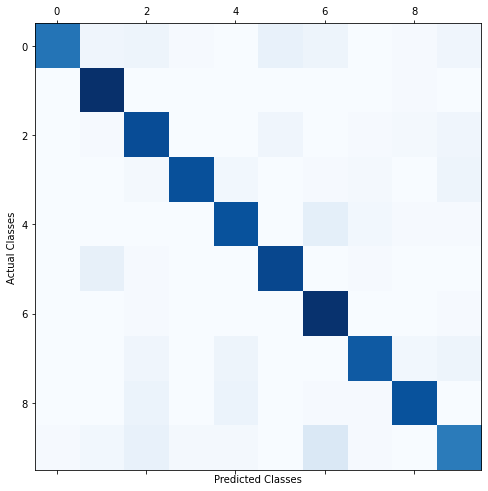

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 8:**




CNN with 6 convolution/max pooling layers (with Drop Out regularization). Change Kernel Size to (5,5)


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 128, 128, 128)     9728      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 128)       409728    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 128)     

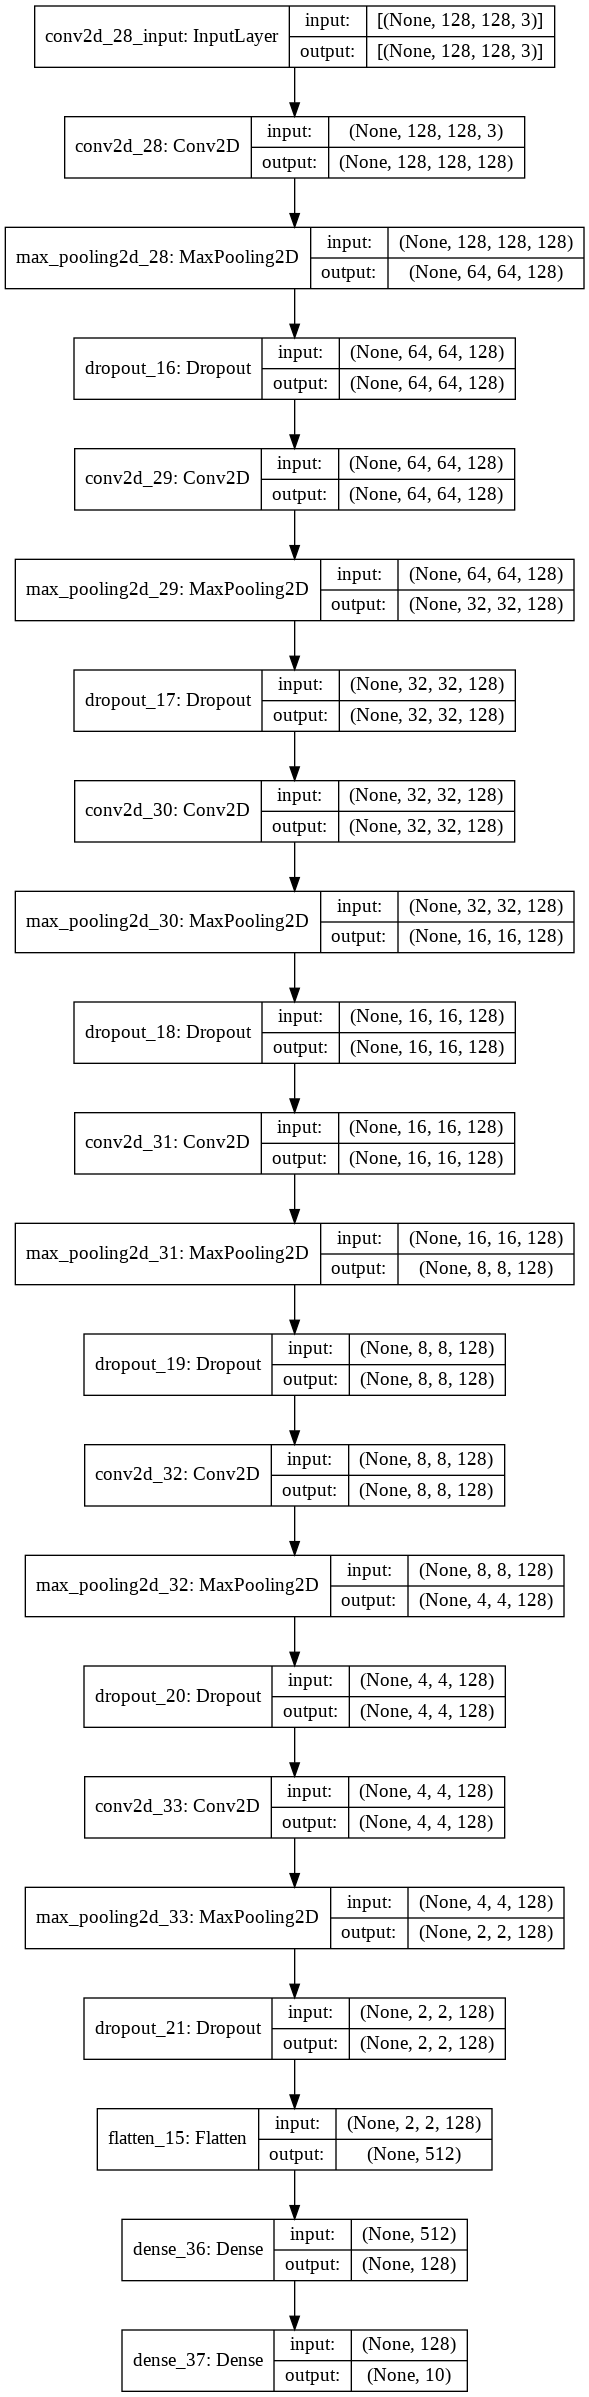

In [ ]:
keras.utils.plot_model(model, "Music_8.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_8/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 46s 314ms/step - loss: 2.4918 - accuracy: 0.1562 - val_loss: 2.1086 - val_accuracy: 0.2700
Epoch 2/200
125/125 [==============================] - 36s 290ms/step - loss: 1.8569 - accuracy: 0.3401 - val_loss: 1.5853 - val_accuracy: 0.4550
Epoch 3/200
125/125 [==============================] - 36s 290ms/step - loss: 1.5708 - accuracy: 0.4429 - val_loss: 1.3359 - val_accuracy: 0.5550
Epoch 4/200
125/125 [==============================] - 36s 285ms/step - loss: 1.3440 - accuracy: 0.5219 - val_loss: 1.2076 - val_accuracy: 0.6040
Epoch 5/200
125/125 [==============================] - 36s 289ms/step - loss: 1.2038 - accuracy: 0.5869 - val_loss: 1.1172 - val_accuracy: 0.6130
Epoch 6/200
125/125 [==============================] - 36s 284ms/step - loss: 1.0708 - accuracy: 0.6371 - val_loss: 1.0301 - val_accuracy: 0.6670
Epoch 7/200
125/125 [==============================] - 36s 288ms/step - loss: 0.9882 - accuracy: 0.6708 - val_loss: 1.0315 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

1343.378784418106

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 117ms/step - loss: 0.3746 - accuracy: 0.8850
test set accuracy:  88.49999904632568
test set loss:  0.37455353140830994


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
32,0.235,0.936,0.396,0.891
33,0.217,0.941,0.458,0.863
34,0.208,0.943,0.398,0.896
35,0.203,0.943,0.413,0.894
36,0.187,0.950,0.367,0.899


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

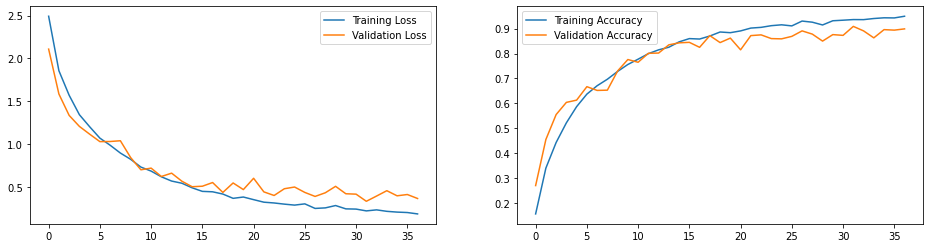

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[88,  1,  2,  1,  0,  2,  0,  0,  1,  5],
       [ 2, 92,  0,  0,  0,  4,  0,  1,  0,  1],
       [ 2,  1, 83,  1,  0,  3,  0,  1,  1,  8],
       [ 0,  0,  0, 93,  1,  0,  0,  0,  4,  2],
       [ 0,  0,  1,  1, 93,  0,  2,  1,  1,  1],
       [ 0,  3,  2,  1,  0, 92,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  2,  0, 95,  0,  0,  1],
       [ 0,  0,  1,  1,  6,  0,  0, 86,  4,  2],
       [ 0,  0,  3,  2,  1,  0,  0,  0, 94,  0],
       [ 0,  2,  1,  5,  2,  0, 14,  4,  3, 69]], dtype=int32)>

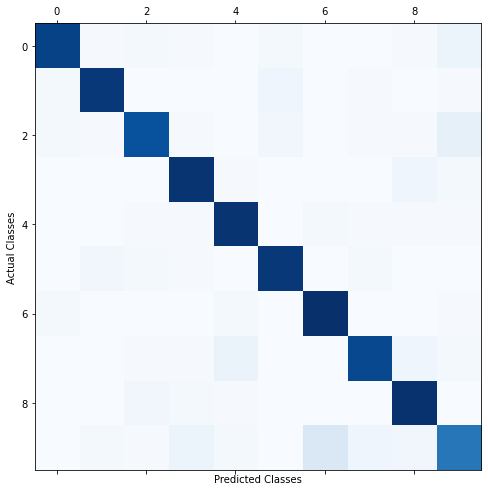

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 9:**




CNN with 6 convolution/max pooling layers (with Drop Out regularization). Change Kernel Size to (5,5)
Increase Dropout to 0.5


## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu,input_shape=(128, 128, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 128, 128, 128)     9728      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 64, 64, 128)       0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 64, 64, 128)       409728    
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 128)     

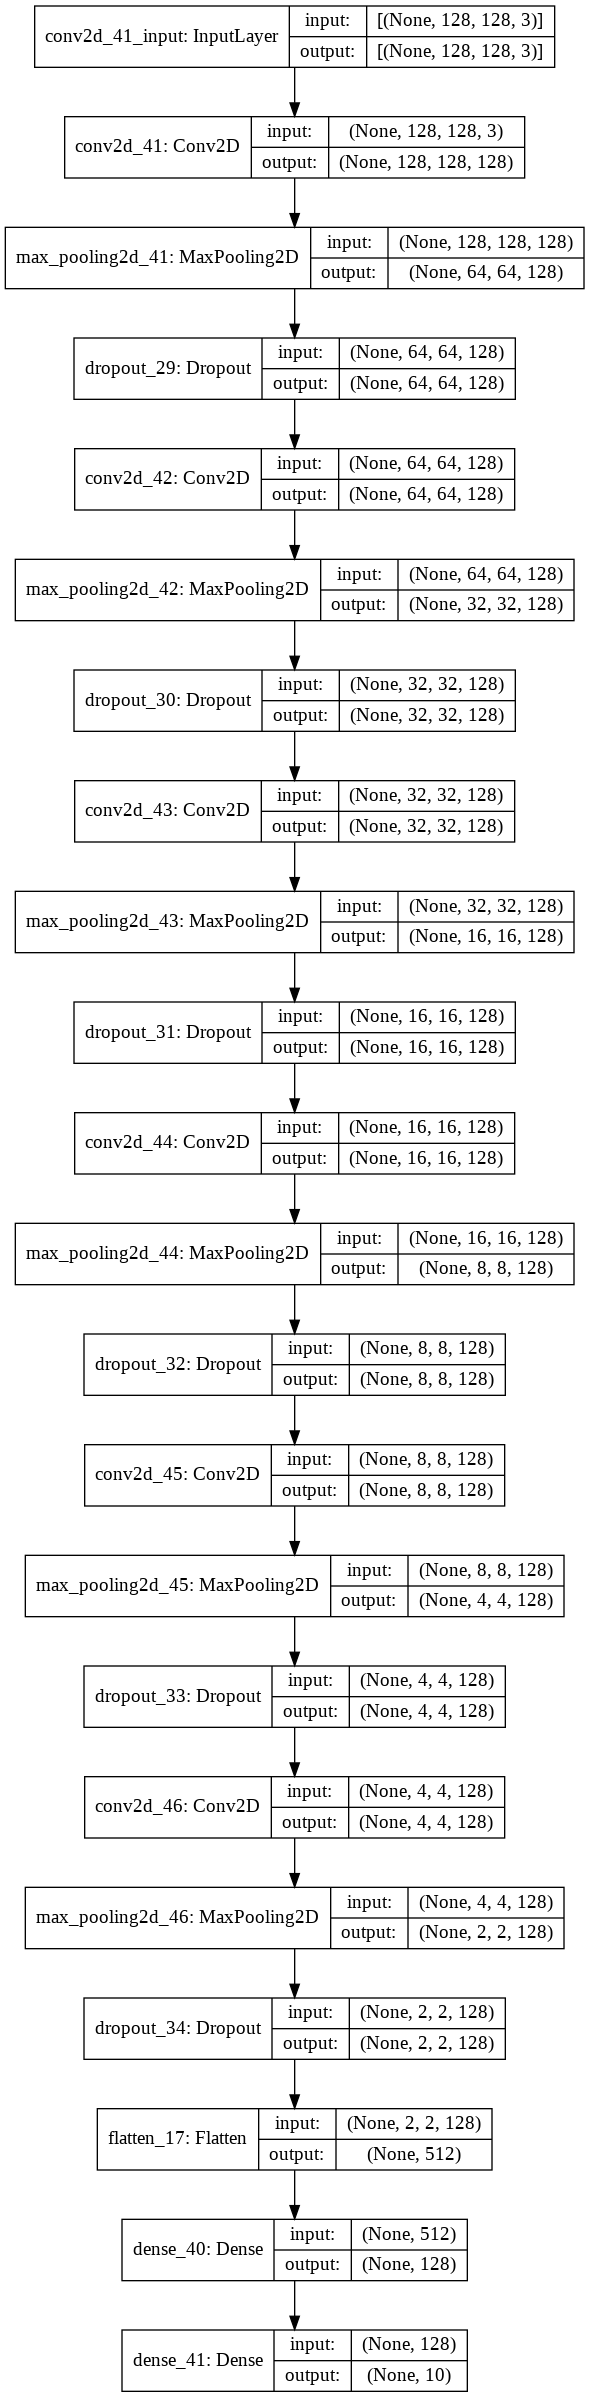

In [ ]:
keras.utils.plot_model(model, "Music_9.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_9/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 38s 293ms/step - loss: 2.6096 - accuracy: 0.1488 - val_loss: 2.3199 - val_accuracy: 0.2440
Epoch 2/200
125/125 [==============================] - 36s 288ms/step - loss: 2.0360 - accuracy: 0.2849 - val_loss: 1.7895 - val_accuracy: 0.4130
Epoch 3/200
125/125 [==============================] - 36s 287ms/step - loss: 1.6318 - accuracy: 0.4291 - val_loss: 1.4664 - val_accuracy: 0.5290
Epoch 4/200
125/125 [==============================] - 36s 288ms/step - loss: 1.4678 - accuracy: 0.4806 - val_loss: 1.5243 - val_accuracy: 0.4770
Epoch 5/200
125/125 [==============================] - 36s 286ms/step - loss: 1.3428 - accuracy: 0.5440 - val_loss: 1.5170 - val_accuracy: 0.4840
Epoch 6/200
125/125 [==============================] - 36s 287ms/step - loss: 1.2679 - accuracy: 0.5595 - val_loss: 1.1886 - val_accuracy: 0.6110
Epoch 7/200
125/125 [==============================] - 36s 288ms/step - loss: 1.1828 - accuracy: 0.6018 - val_loss: 1.1446 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

902.5505056381226

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 2s 121ms/step - loss: 0.7106 - accuracy: 0.7770
test set accuracy:  77.70000100135803
test set loss:  0.7105711102485657


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
20,0.666,0.788,0.791,0.753
21,0.657,0.792,0.781,0.760
22,0.635,0.798,0.947,0.704
23,0.643,0.796,0.868,0.728
24,0.605,0.809,0.690,0.780


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

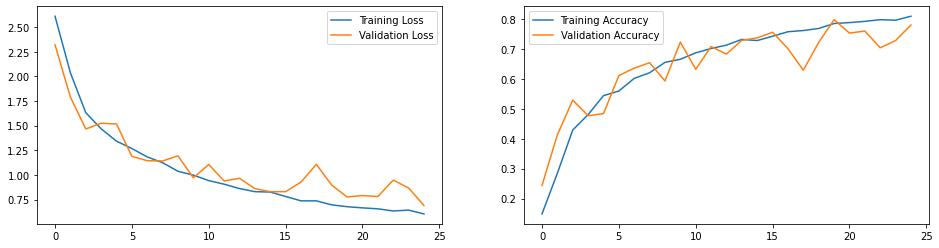

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[61,  1,  6,  0,  1,  7, 10,  0,  4, 10],
       [ 0, 97,  0,  0,  0,  2,  0,  0,  0,  1],
       [ 1,  1, 72,  2,  0,  7,  0,  2,  1, 14],
       [ 0,  0,  1, 82,  1,  0,  8,  2,  0,  6],
       [ 0,  0,  1,  3, 79,  0,  9,  7,  0,  1],
       [ 0, 10,  1,  0,  1, 86,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 95,  0,  0,  4],
       [ 0,  0,  4,  5,  1,  0,  1, 86,  0,  3],
       [ 1,  0,  5,  1, 25,  2,  1,  6, 56,  3],
       [ 0,  2,  6,  5,  4,  1, 16,  2,  1, 63]], dtype=int32)>

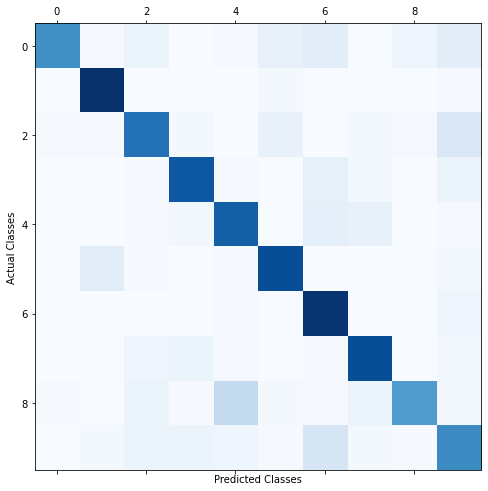

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

# **EXPERIMENT 10:** 


Same as Experiment 8 but with higher resolution images.


In [ ]:
zip_path = '/content/drive/MyDrive/spectrograms3sec/data_large.zip'
!cp "{zip_path}" .
!unzip -q data_large.zip
!rm data_large.zip

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = datagen.flow_from_directory('data/train/',
                                       class_mode='categorical', 
                                       batch_size=64, 
                                       target_size=(220, 216))
valid_it = datagen.flow_from_directory('data/validation/',
                                      class_mode='categorical', 
                                      batch_size=64, 
                                      target_size=(220, 216))


Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
test_it = datagen.flow_from_directory('data/test/',
                                      class_mode='categorical', 
                                      batch_size=n, 
                                      target_size=(220, 216),
                                      shuffle=False)

test_steps_per_epoch = np.math.ceil(test_it.samples / test_it.batch_size)

Found 1000 images belonging to 10 classes.


In [ ]:
true_classes = test_it.classes
class_labels = list(test_it.class_indices.keys())
true_classes[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Create the Model

### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 2 layers Conv2D and MaxPooling handle feature learning.  The last 3 layers, handle classification.  

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu,input_shape=(220, 216, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=128, padding = "same", kernel_size=(5, 5), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.003)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 220, 216, 128)     9728      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 110, 108, 128)     0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 110, 108, 128)     0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 110, 108, 128)     409728    
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 55, 54, 128)       0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 55, 54, 128)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 55, 54, 128)     

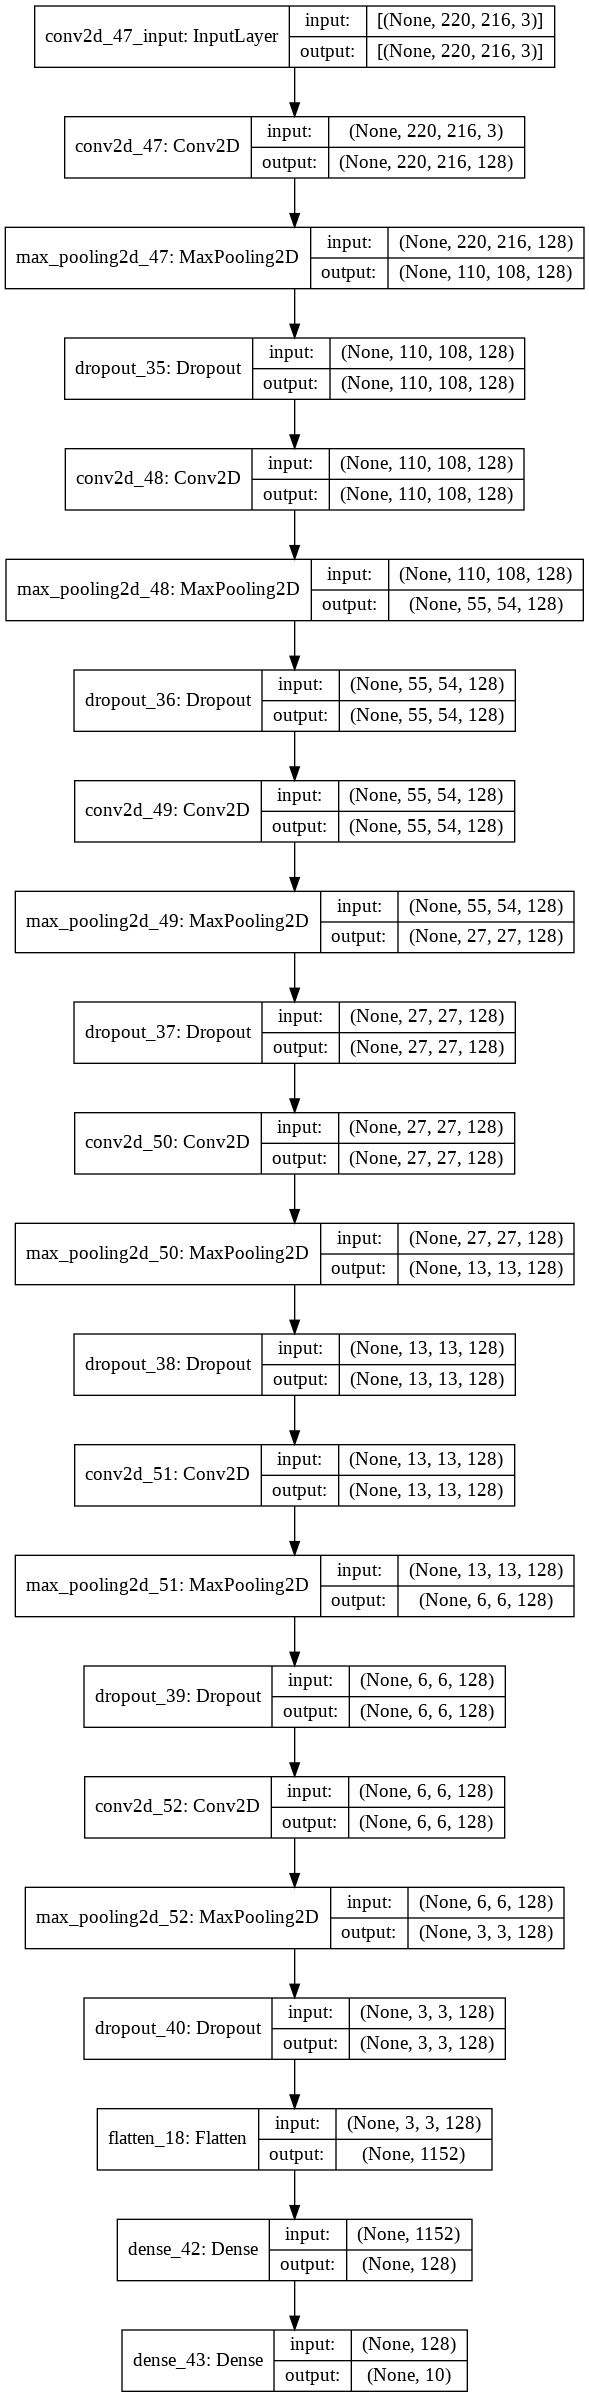

In [ ]:
keras.utils.plot_model(model, "Music_10.png", show_shapes=True) 

### Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [ ]:
start = time()
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=valid_it, 
                    validation_steps=len(valid_it),
                    epochs=200,
                    callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5),
                    tf.keras.callbacks.ModelCheckpoint('./models_10/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
model_time = time() - start

Epoch 1/200
125/125 [==============================] - 95s 676ms/step - loss: 2.4749 - accuracy: 0.1675 - val_loss: 2.1944 - val_accuracy: 0.2140
Epoch 2/200
125/125 [==============================] - 81s 644ms/step - loss: 1.9649 - accuracy: 0.2985 - val_loss: 1.6968 - val_accuracy: 0.3710
Epoch 3/200
125/125 [==============================] - 80s 642ms/step - loss: 1.5679 - accuracy: 0.4530 - val_loss: 1.4046 - val_accuracy: 0.4940
Epoch 4/200
125/125 [==============================] - 81s 643ms/step - loss: 1.3609 - accuracy: 0.5207 - val_loss: 1.2729 - val_accuracy: 0.5970
Epoch 5/200
125/125 [==============================] - 80s 641ms/step - loss: 1.2388 - accuracy: 0.5746 - val_loss: 1.2161 - val_accuracy: 0.5900
Epoch 6/200
125/125 [==============================] - 80s 642ms/step - loss: 1.1545 - accuracy: 0.6054 - val_loss: 1.0005 - val_accuracy: 0.6650
Epoch 7/200
125/125 [==============================] - 80s 641ms/step - loss: 1.0442 - accuracy: 0.6475 - val_loss: 0.8775 -

### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In [ ]:
model_time

2025.589042186737

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(test_it, steps=len(test_it))
print('test set accuracy: ', accuracy * 100)
print('test set loss: ', loss)

16/16 [==============================] - 4s 253ms/step - loss: 0.6336 - accuracy: 0.8300
test set accuracy:  82.99999833106995
test set loss:  0.6336010694503784


## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))
print('shape of preds: ', preds.shape)

shape of preds:  (1000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

,loss,accuracy,val_loss,val_accuracy
20,0.462,0.866,0.467,0.876
21,0.458,0.866,0.527,0.850
22,0.411,0.886,0.471,0.880
23,0.415,0.883,0.447,0.875
24,0.420,0.882,0.562,0.842


In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

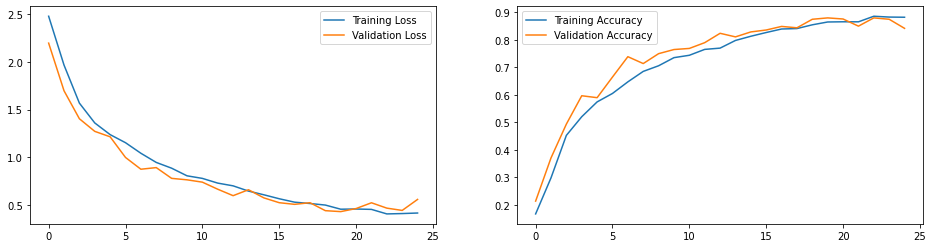

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices

Let us see what the confusion matrix looks like. Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

Get the predicted classes

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

### Visualizing the confusion matrix

In [ ]:
conf_mx = tf.math.confusion_matrix(true_classes, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[78,  1,  1,  2,  0,  5,  3,  0,  0, 10],
       [ 0, 97,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 1,  5, 62,  0,  0,  7,  0,  3,  1, 21],
       [ 0,  1,  2, 84,  1,  0,  2,  3,  0,  7],
       [ 1,  0,  0,  1, 75,  0,  7, 12,  1,  3],
       [ 2, 14,  0,  0,  0, 84,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0, 95,  0,  0,  3],
       [ 0,  4,  0,  2,  0,  0,  0, 94,  0,  0],
       [ 6,  0,  3,  6,  0,  3,  0,  0, 78,  4],
       [ 4,  0,  2,  3,  1,  2,  3,  2,  0, 83]], dtype=int32)>

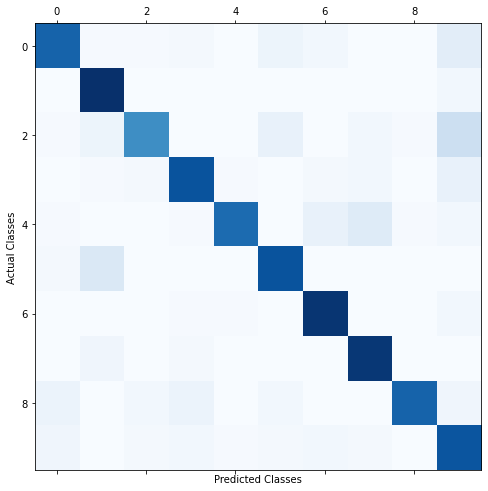

In [ ]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

### Load HDF5 Model Format 

<div class="alert alert-block alert-info">
<b>tf.keras.models.load_model</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model</div>

In [ ]:
model = tf.keras.models.load_model('/content/models_8/model_0.9090.h5')

## Predictions

In [ ]:
preds = model.predict(test_it, steps=len(test_it))

In [ ]:
preds.shape

(1000, 10)

In [ ]:
pred_classes = np.argmax(preds, axis=-1)

In [ ]:
%%shell
jupyter nbconvert --to html /content/MSDS458_A_2_4_Modeling.ipynb

[NbConvertApp] Converting notebook /content/MSDS458_A_2_4_Modeling.ipynb to html
[NbConvertApp] Writing 4896962 bytes to /content/MSDS458_A_2_4_Modeling.html


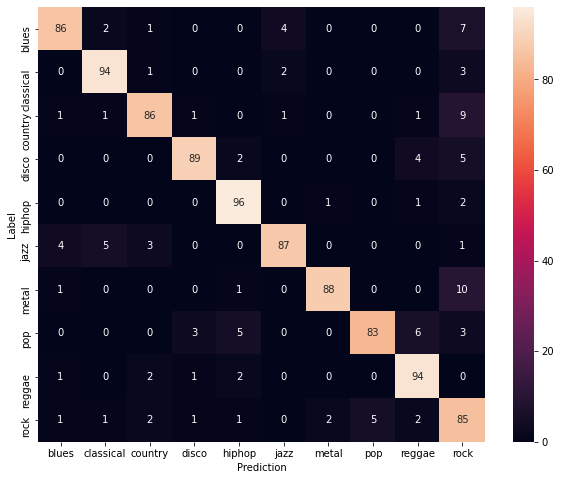

In [ ]:
confusion_mtx = tf.math.confusion_matrix(true_classes, pred_classes) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=genres, yticklabels=genres, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.savefig('Confusion_Matrix.jpg')
plt.show()